# Data preparation

## 1. Loading, Transforming, and Checking Data Quality via EDA


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
account = pd.read_csv('Data/account.csv', delimiter=';')
card = pd.read_csv('Data/card.csv', delimiter=';')
client = pd.read_csv('Data/client.csv', delimiter=';')
disp = pd.read_csv('Data/disp.csv', delimiter=';')
district = pd.read_csv('Data/district.csv', delimiter=';')
loan = pd.read_csv('Data/loan.csv', delimiter=';')
order = pd.read_csv('Data/order.csv', delimiter=';')
trans = pd.read_csv('Data/trans.csv', delimiter=';')


/tmp/ipykernel_1288/1489364043.py:14: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  trans = pd.read_csv('Data/trans.csv', delimiter=';')


### Account

In [2]:
print(account.shape)
print(account.info())
print(account.isnull().sum())
account.head()



(4500, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB
None
account_id     0
district_id    0
frequency      0
date           0
dtype: int64


,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [3]:
account['date'] = pd.to_datetime(account['date'], format='%y%m%d')
account['frequency'].value_counts()


frequency
POPLATEK MESICNE      4167
POPLATEK TYDNE         240
POPLATEK PO OBRATU      93
Name: count, dtype: int64

### Clients

In [4]:
print(client.shape)
print(client.info())
print(client.isnull().sum())
client.head()

(5369, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB
None
client_id       0
birth_number    0
district_id     0
dtype: int64


,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [5]:
# Extract birth date and gender from 'birth_number'
def extract_birth_info(birth_num):
    birth_num = str(int(birth_num)).zfill(6)
    year = int(birth_num[:2])
    month = int(birth_num[2:4])
    day = int(birth_num[4:6])
    if month > 12:
        month -= 50
        gender = 'F'
    else:
        gender = 'M'
    # Since the data is from 1999, assume clients born in 1900-1999
    year += 1900
    return pd.Timestamp(year, month, day), gender

client['birth_date'], client['gender'] = zip(*client['birth_number'].apply(extract_birth_info))

# Calculate age as of January 1, 1999
reference_date = pd.Timestamp('1999-01-01')
client['age'] = (reference_date - client['birth_date']).dt.days // 365

# Verify the result
print(client[['birth_date', 'age', 'gender']].head())


  birth_date  age gender
0 1970-12-13   28      F
1 1945-02-04   53      M
2 1940-10-09   58      F
3 1956-12-01   42      M
4 1960-07-03   38      F


In [6]:
client.describe()

,client_id,birth_number,district_id,birth_date,age
count,5369.000000,5369.000000,5369.000000,5369,5369.000000
mean,3359.011920,535114.970013,37.310114,1953-09-12 09:32:21.143602176,44.833116
min,1.000000,110820.000000,1.000000,1911-08-20 00:00:00,11.000000
25%,1418.000000,406009.000000,14.000000,1940-11-25 00:00:00,30.000000
50%,2839.000000,540829.000000,38.000000,1954-05-06 00:00:00,44.000000
75%,4257.000000,681013.000000,60.000000,1968-06-09 00:00:00,58.000000
max,13998.000000,875927.000000,77.000000,1987-09-27 00:00:00,87.000000
std,2832.911984,172895.618429,25.043690,NaN,17.294431


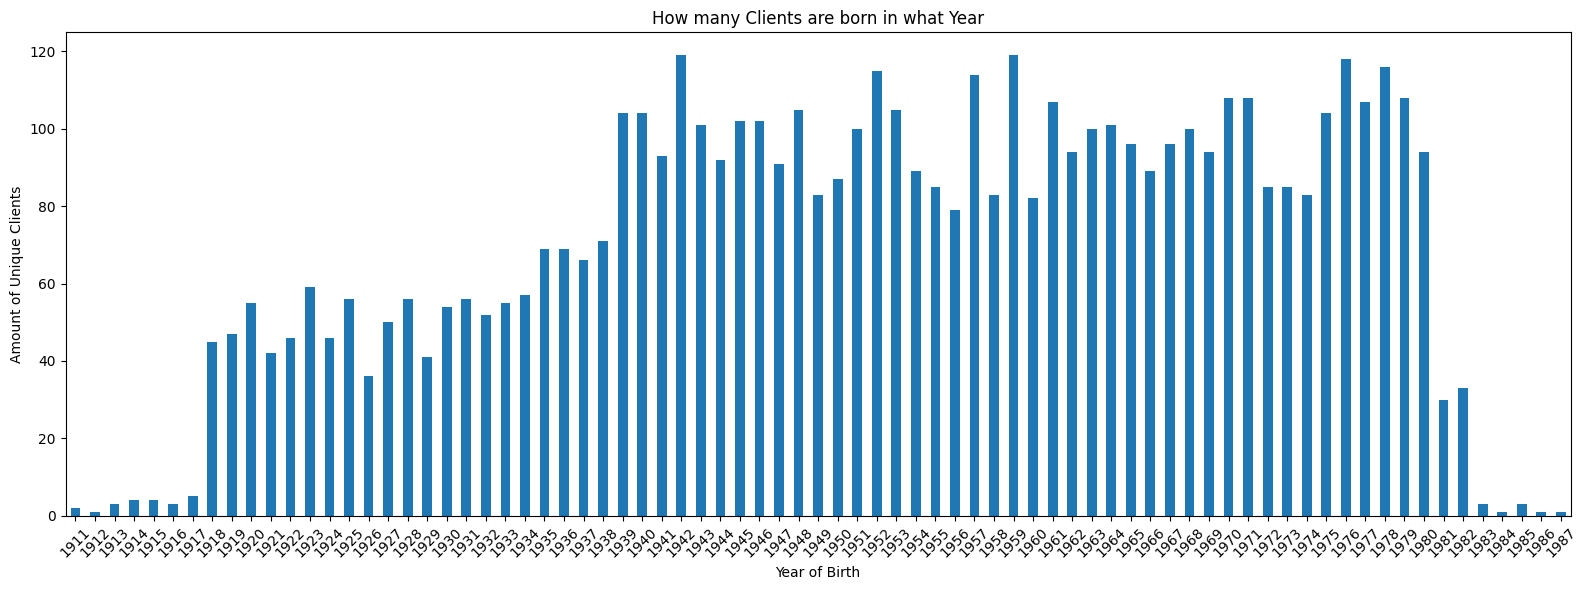

In [7]:
# Plotting the year of birth of the clients

client['birth_year'] = pd.to_datetime(client['birth_date']).dt.year
client_count_per_year = client.groupby('birth_year')['client_id'].nunique()

# Plot
plt.figure(figsize=(16, 6))
client_count_per_year.plot(kind='bar')
plt.title('How many Clients are born in what Year')
plt.xlabel('Year of Birth')
plt.ylabel('Amount of Unique Clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

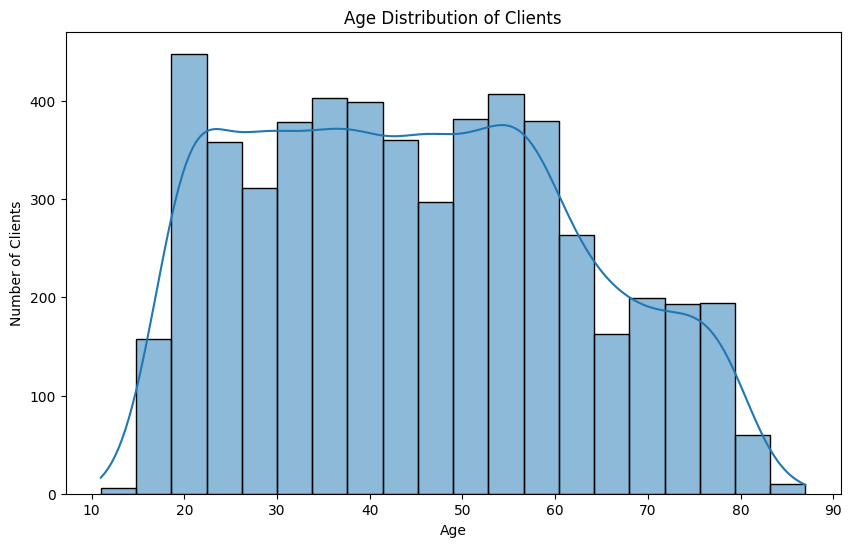

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(client['age'], bins=20, kde=True)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()


/tmp/ipykernel_1288/2789946813.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([client[client['gender'] == 'M']['age'], client[client['gender'] == 'F']['age']],


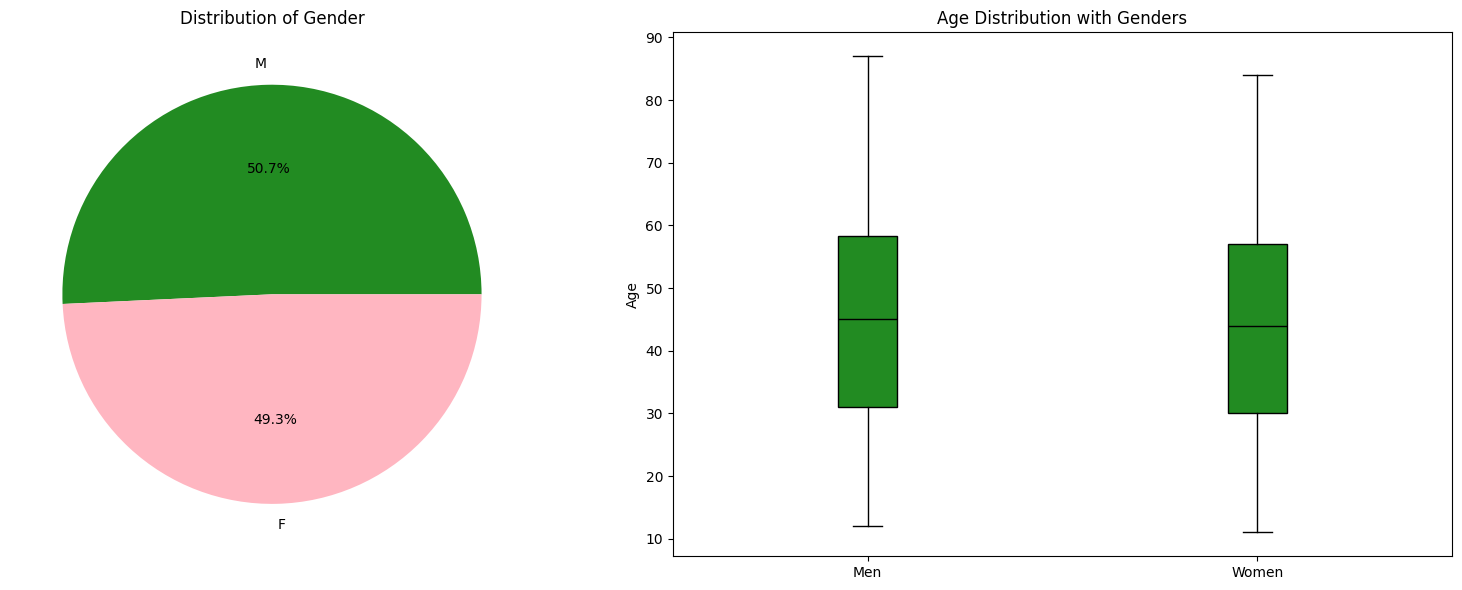

In [9]:
# Having a look at the gender distribution
colors = ['forestgreen', 'lightpink']
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
gender_counts = client['gender'].value_counts()

axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
axes[0].set_title('Distribution of Gender')

axes[1].boxplot([client[client['gender'] == 'M']['age'], client[client['gender'] == 'F']['age']],
                labels=['Men', 'Women'], patch_artist=True,
                boxprops=dict(facecolor=colors[0]),  
                medianprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
axes[1].set_ylabel('Age')
axes[1].set_title('Age Distribution with Genders')

# Plotting
plt.tight_layout()
plt.show()

In [10]:
district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


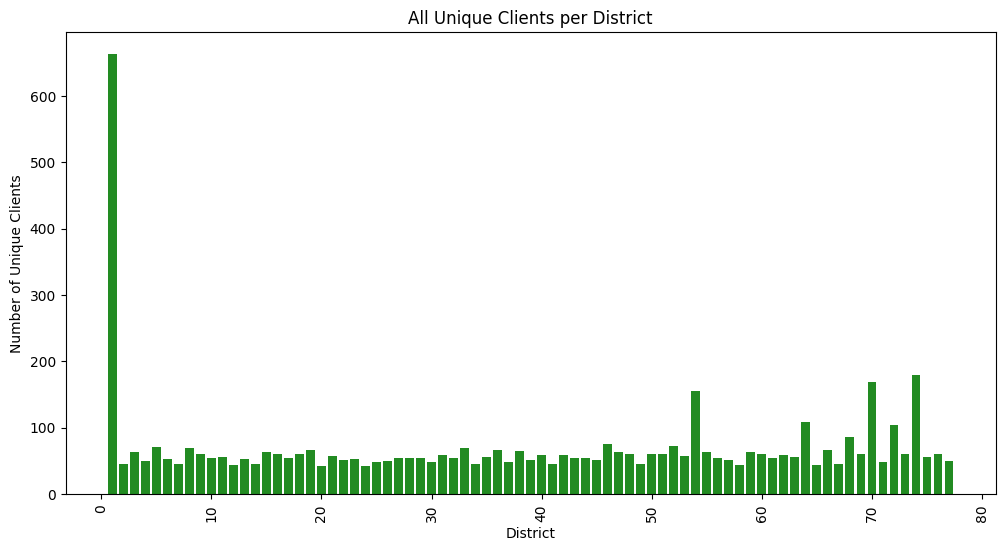

In [11]:
# Check how many unique clients are there per district in the whole dataset
data_client_district = client.merge(district, left_on='district_id', right_on='A1', how='left')
district_counts = data_client_district.groupby('A1')['client_id'].nunique().reset_index(name='unique_client_count')
district_counts = district_counts.rename(columns={'A1': 'District'})

# Plot
plt.figure(figsize=(12, 6))
plt.bar(district_counts['District'], district_counts['unique_client_count'], color='forestgreen')
plt.xlabel("District")
plt.ylabel("Number of Unique Clients")
plt.title("All Unique Clients per District")
plt.xticks(rotation=90)
plt.show()

### Dispositions

In [12]:
print(disp.shape)
print(disp.info())
print(disp.isnull().sum())
disp.head()

(5369, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   int64 
 1   client_id   5369 non-null   int64 
 2   account_id  5369 non-null   int64 
 3   type        5369 non-null   object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB
None
disp_id       0
client_id     0
account_id    0
type          0
dtype: int64


,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [13]:
disp['type'].value_counts()


type
OWNER        4500
DISPONENT     869
Name: count, dtype: int64

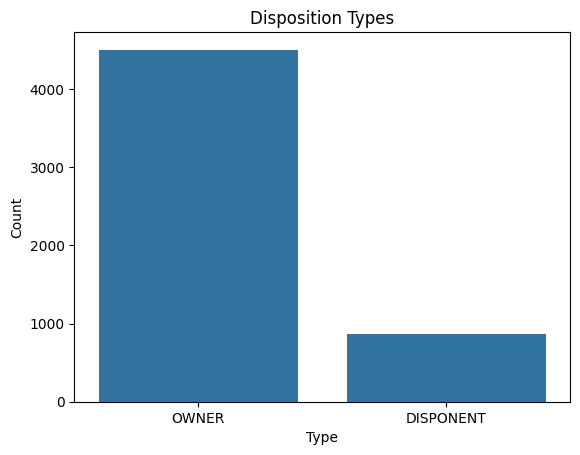

In [14]:
sns.countplot(data=disp, x='type')
plt.title('Disposition Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


### Transactions

In [15]:
print(trans.shape)
print(trans.info())
print(trans.isnull().sum())
trans.head()

(1056320, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1056320 non-null  int64  
 1   account_id  1056320 non-null  int64  
 2   date        1056320 non-null  int64  
 3   type        1056320 non-null  object 
 4   operation   873206 non-null   object 
 5   amount      1056320 non-null  float64
 6   balance     1056320 non-null  float64
 7   k_symbol    574439 non-null   object 
 8   bank        273508 non-null   object 
 9   account     295389 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 80.6+ MB
None
trans_id           0
account_id         0
date               0
type               0
operation     183114
amount             0
balance            0
k_symbol      481881
bank          782812
account       760931
dtype: int64


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [16]:
trans['date'] = pd.to_datetime(trans['date'], format='%y%m%d')
trans['type'].value_counts()


type
VYDAJ     634571
PRIJEM    405083
VYBER      16666
Name: count, dtype: int64

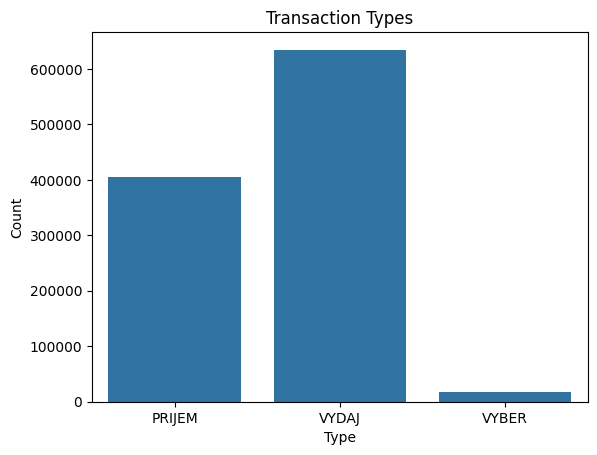

In [17]:
sns.countplot(data=trans, x='type')
plt.title('Transaction Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


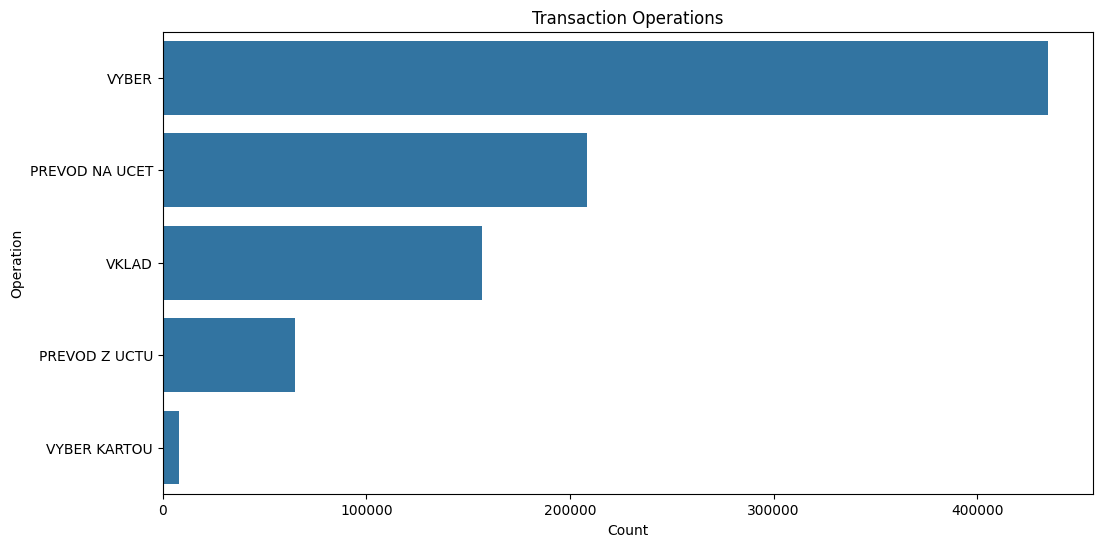

In [18]:
trans['operation'].value_counts()

plt.figure(figsize=(12,6))
sns.countplot(data=trans, y='operation', order=trans['operation'].value_counts().index)
plt.title('Transaction Operations')
plt.xlabel('Count')
plt.ylabel('Operation')
plt.show()



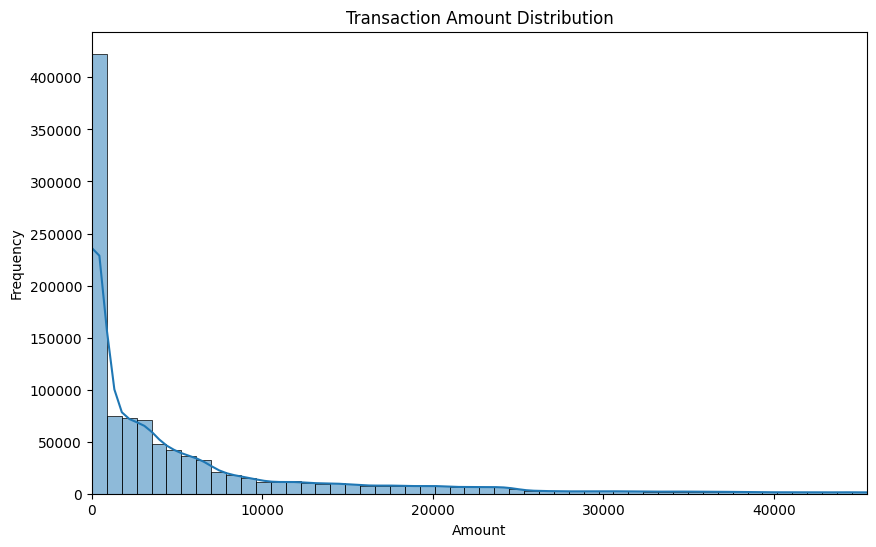

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(trans['amount'], bins=100, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim(0, trans['amount'].quantile(0.99))  # Focus on the 99th percentile
plt.show()


### Loan

In [20]:
print(loan.shape)
print(loan.info())
print(loan.isnull().sum())
loan.head()

(682, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loan_id     682 non-null    int64  
 1   account_id  682 non-null    int64  
 2   date        682 non-null    int64  
 3   amount      682 non-null    int64  
 4   duration    682 non-null    int64  
 5   payments    682 non-null    float64
 6   status      682 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 37.4+ KB
None
loan_id       0
account_id    0
date          0
amount        0
duration      0
payments      0
status        0
dtype: int64


,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [21]:
loan['date'] = pd.to_datetime(loan['date'], format='%y%m%d')
loan['status'].value_counts()



status
C    403
A    203
D     45
B     31
Name: count, dtype: int64

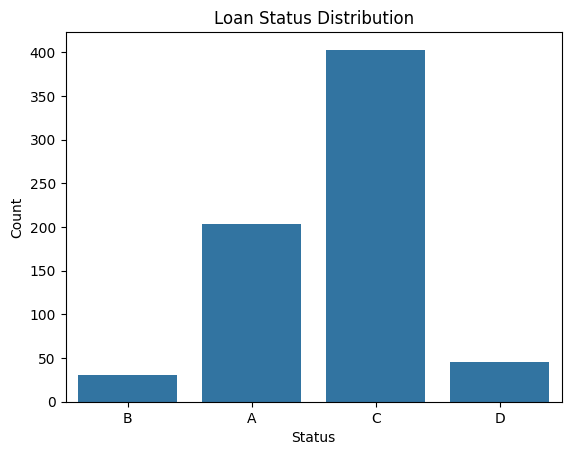

In [22]:
sns.countplot(data=loan, x='status')
plt.title('Loan Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


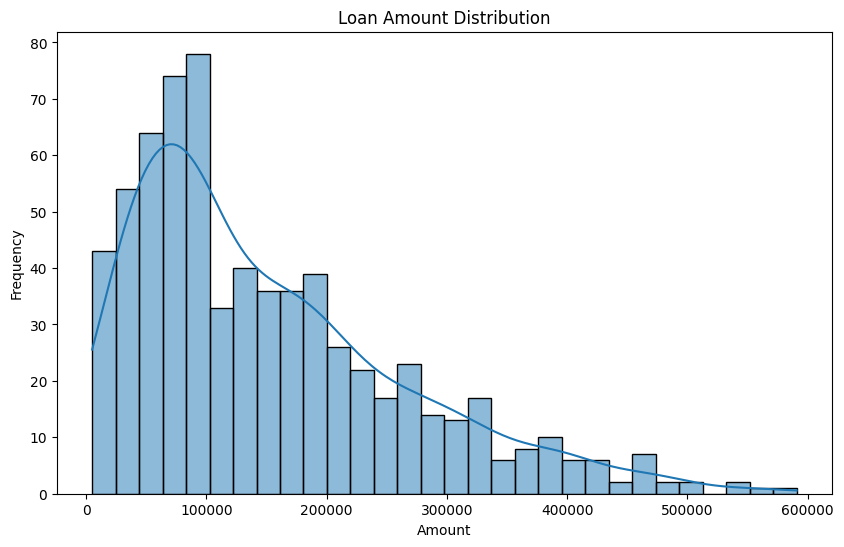

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(loan['amount'], bins=30, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


### Cards

In [24]:
print(card.shape)
print(card.info())
print(card.isnull().sum())
card.head()

(892, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  892 non-null    int64 
 1   disp_id  892 non-null    int64 
 2   type     892 non-null    object
 3   issued   892 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB
None
card_id    0
disp_id    0
type       0
issued     0
dtype: int64


,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00


In [ ]:
card['issued'] = pd.to_datetime(card['issued'], format='%y%m%d %H:%M:%S')
card['type'].value_counts()


type
classic    659
junior     145
gold        88
Name: count, dtype: int64

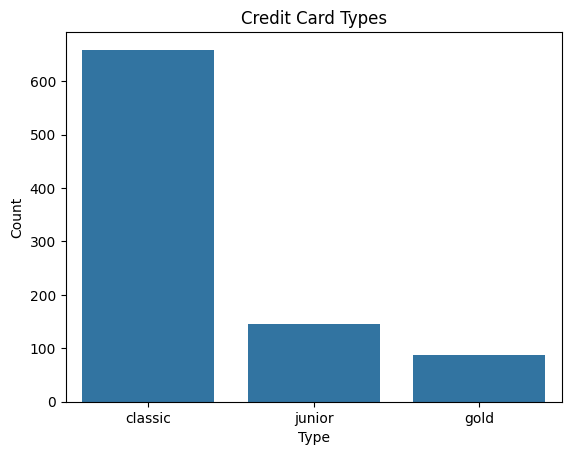

In [26]:
sns.countplot(data=card, x='type')
plt.title('Credit Card Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


### Permanent Orders

In [27]:
print(order.shape)
print(order.info())
print(order.isnull().sum())
order.head()

(6471, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    6471 non-null   int64  
 1   account_id  6471 non-null   int64  
 2   bank_to     6471 non-null   object 
 3   account_to  6471 non-null   int64  
 4   amount      6471 non-null   float64
 5   k_symbol    6471 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 303.5+ KB
None
order_id      0
account_id    0
bank_to       0
account_to    0
amount        0
k_symbol      0
dtype: int64


,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [28]:
order['k_symbol'].value_counts()


k_symbol
SIPO        3502
            1379
UVER         717
POJISTNE     532
LEASING      341
Name: count, dtype: int64

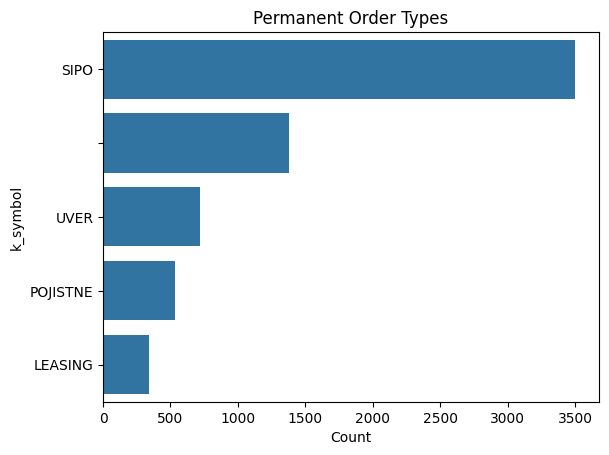

In [29]:
sns.countplot(data=order, y='k_symbol', order=order['k_symbol'].value_counts().index)
plt.title('Permanent Order Types')
plt.xlabel('Count')
plt.ylabel('k_symbol')
plt.show()


### Demographic Data


In [30]:
print(district.shape)
print(district.info())
print(district.isnull().sum())
district.head()

(77, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      77 non-null     int64  
 1   A2      77 non-null     object 
 2   A3      77 non-null     object 
 3   A4      77 non-null     int64  
 4   A5      77 non-null     int64  
 5   A6      77 non-null     int64  
 6   A7      77 non-null     int64  
 7   A8      77 non-null     int64  
 8   A9      77 non-null     int64  
 9   A10     77 non-null     float64
 10  A11     77 non-null     int64  
 11  A12     77 non-null     object 
 12  A13     77 non-null     float64
 13  A14     77 non-null     int64  
 14  A15     77 non-null     object 
 15  A16     77 non-null     int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 9.8+ KB
None
A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [31]:
# Define the new column names based on the data description
district.columns = [
    'district_id',              # A1
    'district_name',            # A2
    'region',                   # A3
    'no_of_inhabitants',        # A4
    'no_of_municipalities_0_499',   # A5
    'no_of_municipalities_500_1999',# A6
    'no_of_municipalities_2000_9999',# A7
    'no_of_municipalities_10000_inf',# A8
    'no_of_cities',                 # A9
    'ratio_urban_inhabitants',      # A10
    'average_salary',               # A11
    'unemployment_rate_95',         # A12
    'unemployment_rate_96',         # A13
    'entrepreneurs_per_1000',       # A14
    'no_of_crimes_95',              # A15
    'no_of_crimes_96'               # A16
]


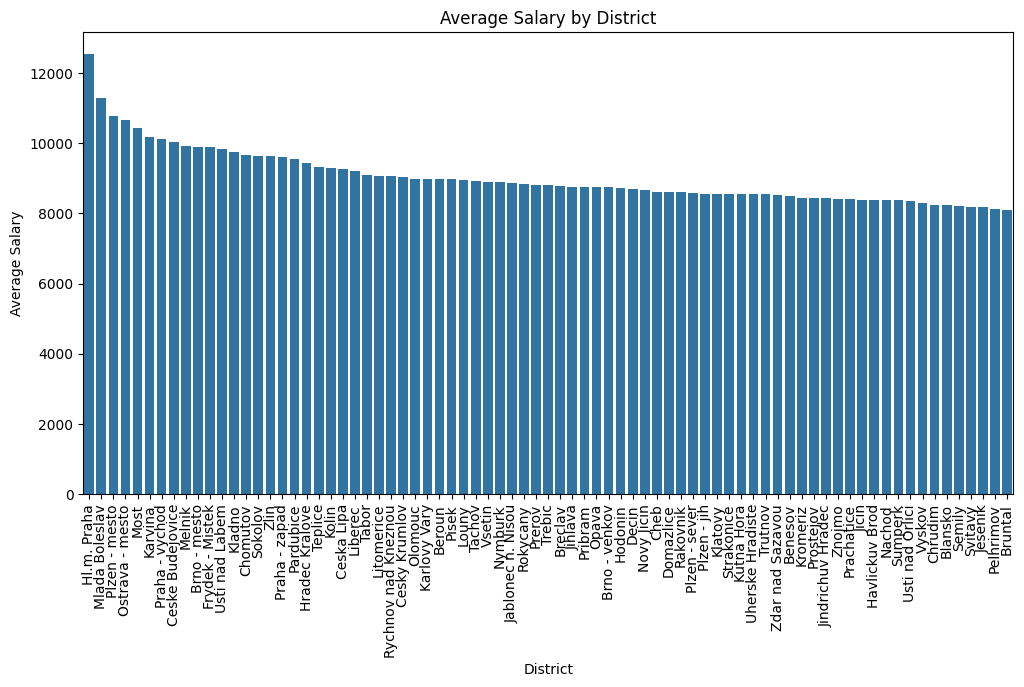

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(data=district.sort_values('average_salary', ascending=False), x='district_name', y='average_salary')
plt.title('Average Salary by District')
plt.xlabel('District')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()


## 2. Combining Customer and Banking Service Information


In [33]:
client_disp = pd.merge(client, disp, on='client_id', how='inner')
client_account = pd.merge(client_disp, account, on='account_id', how='inner')
client_account.rename(columns={'district_id_x': 'client_district_id', 'district_id_y': 'account_district_id'}, inplace=True)
client_account = pd.merge(
    client_account,
    district,
    left_on='client_district_id',
    right_on='district_id',
    how='left'
)


In [34]:
# First, combine `loan` with `account` to get account-level loan information
loan_account = pd.merge(loan, account, on='account_id', how='inner')

# Then, combine with `client_account` DataFrame
client_account_loan = pd.merge(client_account, loan_account, on='account_id', how='left', suffixes=('', '_loan'))

# Combine `card` with `disp` to get client-level card information
card_disp = pd.merge(card, disp, on='disp_id', how='inner')

# Then, combine with `client_account_loan` DataFrame
client_full = pd.merge(client_account_loan, card_disp, on=['client_id', 'account_id'], how='left', suffixes=('', '_card'))


#### Data Pipeline Overview:
1. Loaded raw data (accounts, clients, dispositions, transactions, etc.)
2. Transformed date formats, extracted age and gender from birth_number.
3. Merged client, account, and district information into a single DataFrame.

## 3. Cleaning the Dataset for Model Development


In [35]:
# Identify columns with missing values
missing_values = client_full.isnull().sum()
print(missing_values[missing_values > 0])

# Decide on a strategy:
# - Drop columns or rows with excessive missing values
# - Impute missing values using appropriate methods


loan_id             4542
date_x              4542
amount              4542
duration            4542
payments            4542
status              4542
district_id_loan    4542
frequency_loan      4542
date_y              4542
card_id             4477
disp_id_card        4477
type_x              4477
issued              4477
type_y              4477
dtype: int64


In [36]:
# Example: Encoding 'gender' variable
client_full['gender'] = client_full['gender'].map({'M': 0, 'F': 1})

# Use one-hot encoding for nominal categories
client_full = pd.get_dummies(client_full, columns=['frequency', 'type', 'status'], drop_first=True)


In [37]:
columns_to_drop = ['birth_number', 'birth_date', 'disp_id', 'date', 'date_x', 'date_y','issued']
client_full.drop(columns=columns_to_drop, inplace=True)


In [38]:
# Example: Creating a feature for loan-to-income ratio
client_full['loan_to_income'] = client_full['amount'] / client_full['average_salary']

# Fill NaN values resulting from division (e.g., where loan amount is NaN)
client_full['loan_to_income'].fillna(0, inplace=True)


/tmp/ipykernel_1288/391314314.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  client_full['loan_to_income'].fillna(0, inplace=True)


# Model Construction

## 4. Identifying Existing Credit Card Holders, Including Purchase Date and Roll-Up Window


In [39]:
# Merge 'card' and 'disp' to get client-level credit card information
card_disp = pd.merge(card, disp, on='disp_id', how='inner')

# Merge with 'client' to get client details
card_clients = pd.merge(card_disp, client, on='client_id', how='inner')


In [40]:
# Ensure 'issued' is in datetime format
card_clients['issued'] = pd.to_datetime(card_clients['issued'], format='%y%m%d %H:%M:%S')

# Verify the data
print(card_clients[['client_id', 'issued']].head())


   client_id     issued
0       9593 1993-11-07
1        588 1994-01-19
2       4915 1994-02-05
3        439 1994-02-08
4       3687 1994-02-15


In [41]:
# Define the roll-up window 
from datetime import timedelta

card_clients['rollup_start_date'] = card_clients['issued'] - timedelta(days=396)
card_clients['rollup_end_date'] = card_clients['issued'] - timedelta(days=31)


In [42]:
card_clients.columns

Index(['card_id', 'disp_id', 'type_x', 'issued', 'client_id', 'account_id',
       'type_y', 'birth_number', 'district_id', 'birth_date', 'gender', 'age',
       'birth_year', 'rollup_start_date', 'rollup_end_date'],
      dtype='object')

In [43]:
card_clients['age_at_issue'] = (card_clients['issued'] - card_clients['birth_date']).dt.days / 365.25
junior_holders = card_clients[card_clients['type_x'] == 'junior']

oldest_junior_age_at_issue = junior_holders['age_at_issue'].max()
print(f"The oldest person who got a junior card was {oldest_junior_age_at_issue:.2f} years old at issuance.")

card_clients = card_clients[card_clients['type_x'] != 'junior']


The oldest person who got a junior card was 20.89 years old at issuance.


## 5. Determining Non-Buyers for Comparison (Including Roll-Up Window)


In [44]:
# Get all clients
all_clients = client['client_id'].unique()

# Clients with credit cards
card_holders = card_clients['client_id'].unique()

# Identify non-buyers
non_buyers = set(all_clients) - set(card_holders)
non_buyers = pd.DataFrame({'client_id': list(non_buyers)})

non_buyers = pd.merge(non_buyers, client[['client_id', 'birth_date']], on='client_id', how='left')



In [45]:
non_buyers['birth_date'] = pd.to_datetime(non_buyers['birth_date'], errors='coerce')
required_days = oldest_junior_age_at_issue * 365.25


In [46]:
chosen_reference_dates = []
buyer_dates = card_clients['issued'].dropna().values


for idx, row in non_buyers.iterrows():
    birth_date = row['birth_date']
    # Minimum eligible date for this non-buyer to be older than the oldest junior holder
    min_eligible_date = birth_date + pd.Timedelta(days=required_days)
    
    # Filter buyer_dates to those that would make non-buyer older than oldest_junior_age_at_issue
    eligible_dates = buyer_dates[buyer_dates > np.datetime64(min_eligible_date)]
    
    if len(eligible_dates) == 0:
        # If no eligible date found, decide on an action.
        # For example, assign NaT or skip.
        chosen_date = pd.NaT
    else:
        # Randomly choose one eligible date
        chosen_date = np.random.choice(eligible_dates)
    
    chosen_reference_dates.append(chosen_date)

# Assign chosen reference dates to non_buyers_disp
non_buyers['reference_date'] = chosen_reference_dates


In [47]:
# Assume the last transaction date as the reference date

non_buyers['rollup_end_date'] = non_buyers['reference_date'] - timedelta(days=1)
non_buyers['rollup_start_date'] = non_buyers['rollup_end_date'] - timedelta(days=366)


In [48]:
buyers_with_full_rollup = card_clients[card_clients['rollup_end_date'] - card_clients['rollup_start_date'] >= pd.Timedelta(days=365)]
non_buyers_with_full_rollup = non_buyers[non_buyers['rollup_end_date'] - non_buyers['rollup_start_date'] >= pd.Timedelta(days=0)]

print("Number of Credit Card Buyers with 12-month Roll-Up:", len(buyers_with_full_rollup))
print("Number of Non-Buyers with 12-month Roll-Up:", len(non_buyers_with_full_rollup))



Number of Credit Card Buyers with 12-month Roll-Up: 747
Number of Non-Buyers with 12-month Roll-Up: 4244


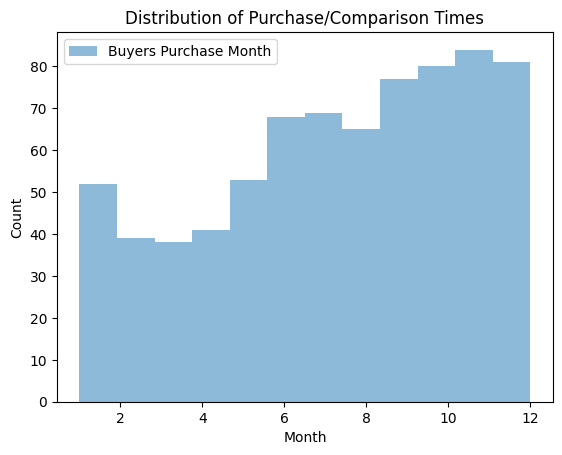

In [49]:
purchase_times = buyers_with_full_rollup['issued']
# For non-buyers, define a reference date, e.g., the reference_date chosen previously.
comparison_times = non_buyers_with_full_rollup['rollup_end_date']

plt.figure()
plt.hist(purchase_times.dt.month, bins=12, alpha=0.5, label='Buyers Purchase Month')
plt.title('Distribution of Purchase/Comparison Times')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.show()


## 6. Generating Event-Related Customer Information Before Credit Card Purchase Based on Transaction History


In [50]:
# Ensure 'date' is in datetime format
trans['date'] = pd.to_datetime(trans['date'], format='%y%m%d')

# Merge transactions with dispositions to get client IDs
trans_disp = pd.merge(trans, disp, on='account_id', how='inner')


In [51]:
def get_transactions_within_window(client_id, start_date, end_date):
    client_trans = trans_disp[trans_disp['client_id'] == client_id]
    window_trans = client_trans[(client_trans['date'] >= start_date) & (client_trans['date'] <= end_date)]
    return window_trans

# Apply to all card clients
card_clients['transactions'] = card_clients.apply(
    lambda row: get_transactions_within_window(
        row['client_id'], row['rollup_start_date'], row['rollup_end_date']
    ), axis=1
)


In [52]:
def extract_features(transactions):
    features = {}
    features['num_transactions'] = len(transactions)
    features['total_amount'] = transactions['amount'].sum()
    features['average_amount'] = transactions['amount'].mean()
    features['max_balance'] = transactions['balance'].max()
    features['min_balance'] = transactions['balance'].min()
    # Add more features as needed
    return pd.Series(features)

# Extract features for each client
card_clients = card_clients.join(card_clients['transactions'].apply(extract_features))


In [53]:
# Merge non-buyers with dispositions to get account IDs
non_buyers_disp = pd.merge(non_buyers, disp, on='client_id', how='inner')

# Merge with accounts to get account opening dates if needed
non_buyers_disp = pd.merge(non_buyers_disp, account, on='account_id', how='inner')


In [54]:
non_buyers_disp['transactions'] = non_buyers_disp.apply(
    lambda row: get_transactions_within_window(
        row['client_id'], row['rollup_start_date'], row['rollup_end_date']
    ), axis=1
)


In [55]:
# Extract features for each non-buyer
non_buyers_disp = non_buyers_disp.join(non_buyers_disp['transactions'].apply(extract_features))


In [56]:
# Add a target variable: 1 for buyers, 0 for non-buyers
card_clients['target'] = 1
non_buyers_disp['target'] = 0

# Select relevant features and combine datasets
features = ['client_id', 'num_transactions', 'total_amount', 'average_amount', 'max_balance', 'min_balance', 'target']
buyers_data = card_clients[features]
non_buyers_data = non_buyers_disp[features]

# Combine the data
model_data = pd.concat([buyers_data, non_buyers_data], ignore_index=True)


In [57]:
model_data.head()

,client_id,num_transactions,total_amount,average_amount,max_balance,min_balance,target
0,9593,62.0,1023251.9,16504.062903,124339.4,600.0,1
1,588,26.0,227104.7,8734.796154,56942.8,900.0,1
2,4915,44.0,533463.5,12124.170455,81177.0,300.0,1
3,439,56.0,504138.9,9002.480357,80116.3,600.0,1
4,3687,51.0,721859.4,14154.105882,107680.9,900.0,1


# Feature Engineering


## 7. Deriving Customer-Specific Statistical Metrics for Wealth and Transactions in the Roll-Up Window


In [58]:
def calculate_wealth_metrics(transactions):
    if transactions.empty:
        return pd.Series({
            'avg_balance': 0,
            'balance_std': 0,
            'ending_balance': 0
        })
    else:
        balances = transactions['balance']
        avg_balance = balances.mean()
        balance_std = balances.std()
        # Assuming transactions are sorted by date
        ending_balance = transactions.sort_values('date', ascending=True)['balance'].iloc[-1]
        return pd.Series({
            'avg_balance': avg_balance,
            'balance_std': balance_std,
            'ending_balance': ending_balance
        })


In [59]:
def calculate_transaction_metrics(transactions):
    if transactions.empty:
        return pd.Series({
            'num_debit_transactions': 0,
            'num_credit_transactions': 0,
            'total_debit_amount': 0,
            'total_credit_amount': 0,
            'avg_transaction_amount': 0,
            'transaction_frequency': 0
        })
    else:
        num_transactions = len(transactions)
        num_debit_transactions = len(transactions[transactions['type_x'] == 'VYDAJ'])
        num_credit_transactions = len(transactions[transactions['type_x'] == 'PRIJEM'])
        total_debit_amount = transactions[transactions['type_x'] == 'VYDAJ']['amount'].sum()
        total_credit_amount = transactions[transactions['type_x'] == 'PRIJEM']['amount'].sum()
        avg_transaction_amount = transactions['amount'].mean()
        # Calculate transaction frequency as transactions per day
        num_days = (transactions['date'].max() - transactions['date'].min()).days + 1
        transaction_frequency = num_transactions / num_days if num_days > 0 else 0
        return pd.Series({
            'num_debit_transactions': num_debit_transactions,
            'num_credit_transactions': num_credit_transactions,
            'total_debit_amount': total_debit_amount,
            'total_credit_amount': total_credit_amount,
            'avg_transaction_amount': avg_transaction_amount,
            'transaction_frequency': transaction_frequency
        })


In [60]:
# Apply the wealth metrics function
card_clients = card_clients.join(card_clients['transactions'].apply(calculate_wealth_metrics))
card_clients = card_clients.join(card_clients['transactions'].apply(calculate_transaction_metrics))


In [61]:
# Apply the wealth metrics function
non_buyers_disp = non_buyers_disp.join(non_buyers_disp['transactions'].apply(calculate_wealth_metrics))
non_buyers_disp = non_buyers_disp.join(non_buyers_disp['transactions'].apply(calculate_transaction_metrics))


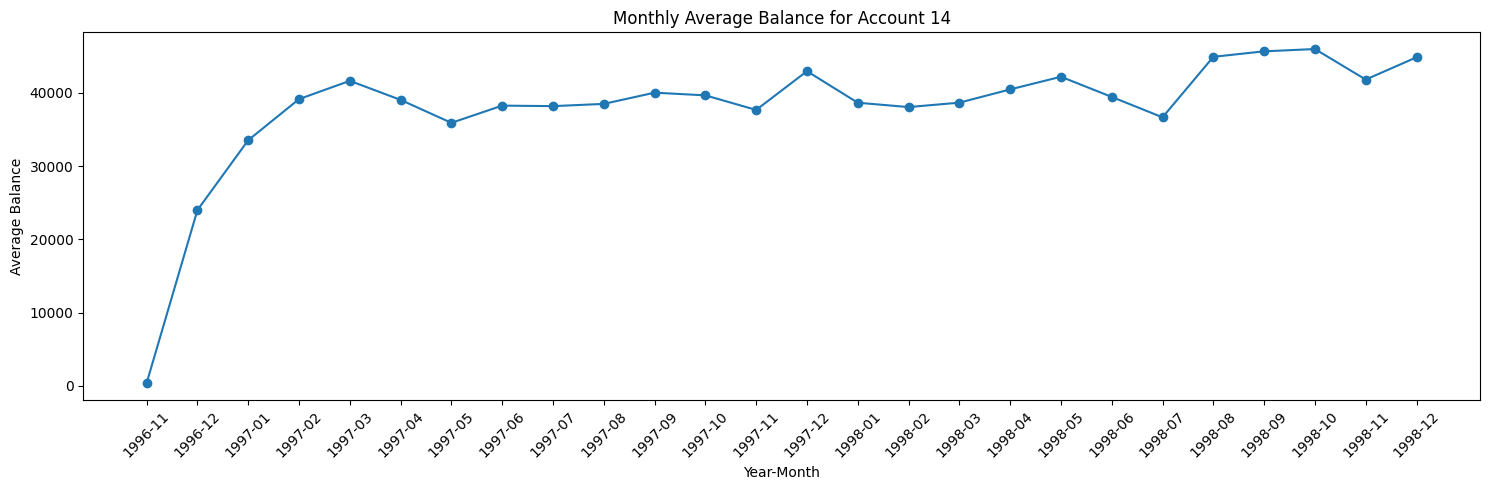

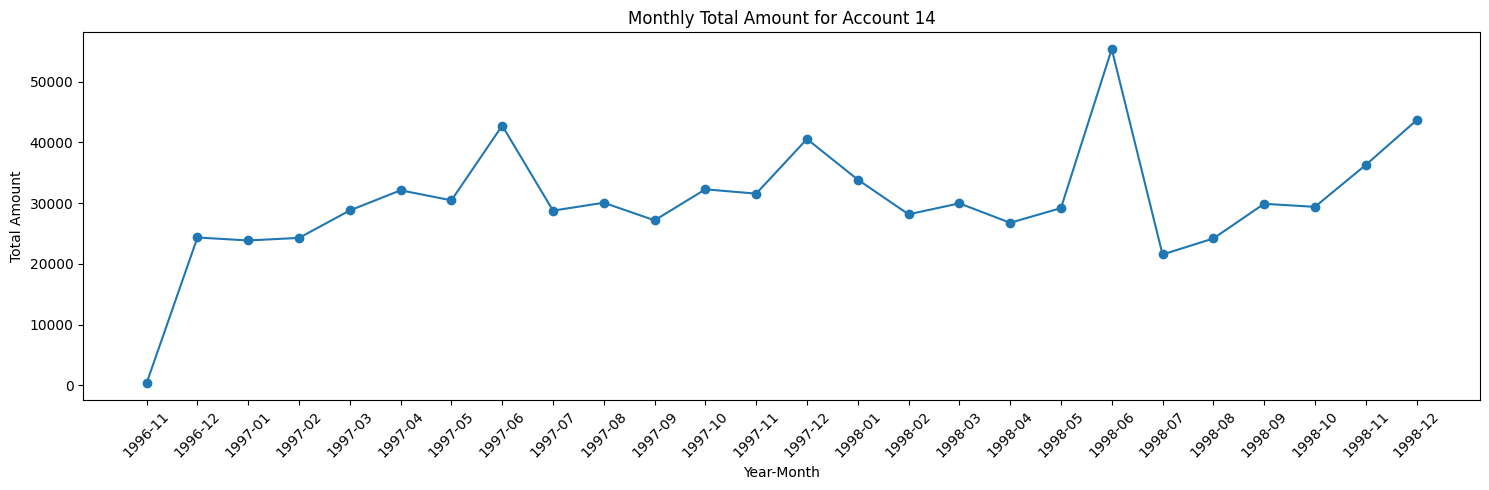

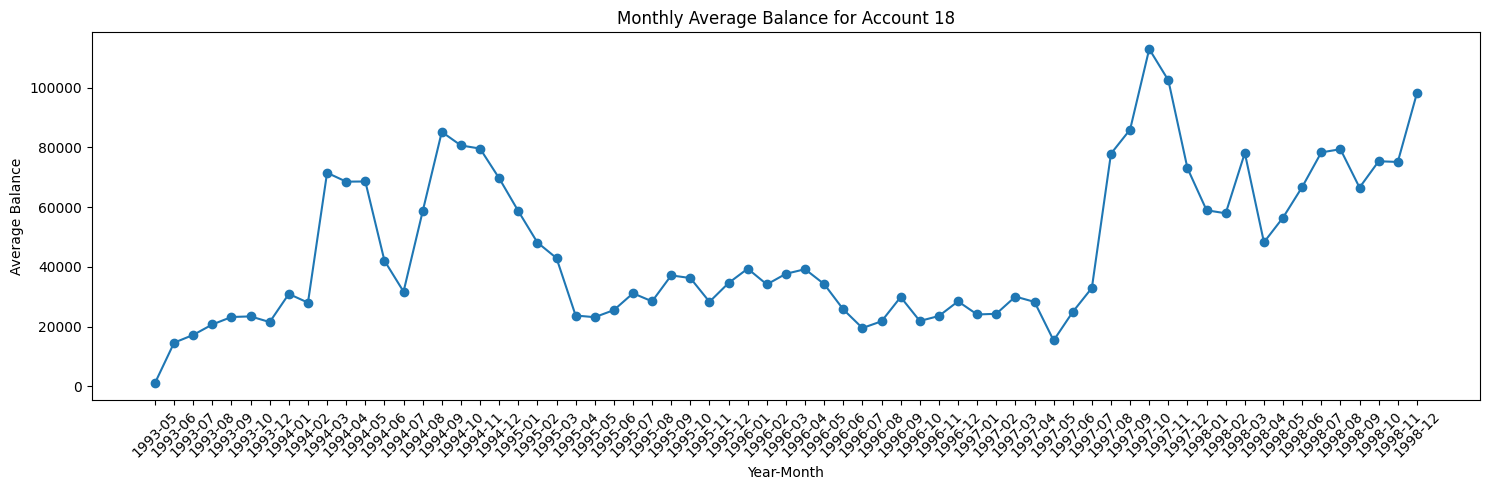

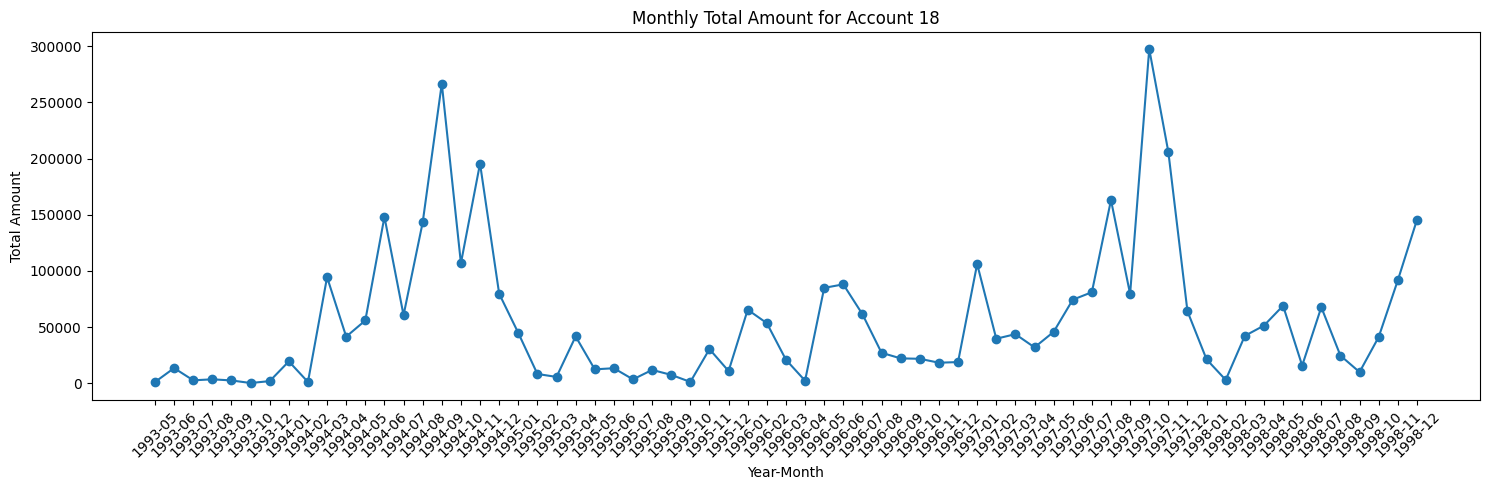

In [62]:
def plot_monthly_trends(account_id):
    # Filter transactions for the specified account
    account_data = trans_disp[trans_disp['account_id'] == account_id].copy()

    # Ensure 'date' is datetime
    account_data['date'] = pd.to_datetime(account_data['date'], errors='coerce')

    # Extract year and month
    account_data['year_month'] = account_data['date'].dt.to_period('M')

    # Aggregate monthly metrics: average balance and total amount
    monthly_stats = account_data.groupby('year_month').agg(
        avg_balance=('balance', 'mean'),
        total_amount=('amount', 'sum')
    ).reset_index()

    # Convert Period to string for plotting
    monthly_stats['year_month'] = monthly_stats['year_month'].astype(str)

    # Plot Average Balance Over Time
    plt.figure(figsize=(15,5))
    plt.plot(monthly_stats['year_month'], monthly_stats['avg_balance'], marker='o')
    plt.title(f'Monthly Average Balance for Account {account_id}')
    plt.xlabel('Year-Month')
    plt.ylabel('Average Balance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot Total Amount (Revenue) Over Time
    plt.figure(figsize=(15,5))
    plt.plot(monthly_stats['year_month'], monthly_stats['total_amount'], marker='o')
    plt.title(f'Monthly Total Amount for Account {account_id}')
    plt.xlabel('Year-Month')
    plt.ylabel('Total Amount')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage for Account #14 and Account #18:
plot_monthly_trends(14)
plot_monthly_trends(18)


## 8. Combining Event-Related Information from Credit Card Buyers and Non-Buyers


In [63]:
buyers_features = [
    'client_id', 'avg_balance', 'max_balance', 'min_balance', 'balance_std', 'ending_balance',
    'num_transactions', 'num_debit_transactions', 'num_credit_transactions',
    'total_debit_amount', 'total_credit_amount', 'avg_transaction_amount', 'transaction_frequency'
]

buyers_data = card_clients[buyers_features].copy()
buyers_data['target'] = 1


In [64]:
non_buyers_features = buyers_features  # Same features as buyers

non_buyers_data = non_buyers_disp[non_buyers_features].copy()
non_buyers_data['target'] = 0


In [65]:
model_data = pd.concat([buyers_data, non_buyers_data], ignore_index=True)


In [66]:
# Reset index
model_data.reset_index(drop=True, inplace=True)

# Handle missing values, if any
model_data.fillna(0, inplace=True)


## 9. Cleaning Unnecessary Information (e.g., IDs) and Checking the Modeling Data via Exploratory Data Analysis


In [67]:
model_data = client.merge(model_data, on='client_id', how='inner')

In [68]:
model_data.head()

,client_id,birth_number,district_id,birth_date,gender,age,birth_year,avg_balance,max_balance,min_balance,balance_std,ending_balance,num_transactions,num_debit_transactions,num_credit_transactions,total_debit_amount,total_credit_amount,avg_transaction_amount,transaction_frequency,target
0,1,706213,18,1970-12-13,F,28,1970,16846.294595,23318.2,11127.5,2441.278860,16315.8,74.0,45.0,29.0,53439.2,50115.9,1399.393243,0.206128,0
1,2,450204,1,1945-02-04,M,53,1945,42433.159756,69302.0,20515.7,10806.404738,40427.3,82.0,52.0,27.0,265367.2,278532.5,6950.252439,0.229692,0
2,3,406009,1,1940-10-09,F,58,1940,42938.909195,69302.0,25037.1,10299.807569,27302.0,87.0,56.0,26.0,249667.2,274634.3,6595.936782,0.248571,0
3,4,561201,5,1956-12-01,M,42,1956,20001.773810,30073.7,1000.0,7503.008748,7593.5,42.0,25.0,17.0,58326.8,65920.4,2958.266667,0.192661,0
4,5,605703,5,1960-07-03,F,38,1960,22179.982278,31621.4,7593.5,5712.151579,31621.4,79.0,49.0,30.0,91739.4,114835.0,2614.865823,0.218837,0


In [69]:
# Remove IDs and other non-feature columns
columns_to_drop = ['client_id', 'birth_number', 'birth_date']  # Add any other unnecessary columns
model_data_cleaned = model_data.drop(columns=columns_to_drop)
model_data_cleaned['gender'] =   model_data_cleaned['gender'].map({'M': 0, 'F': 1})


In [70]:
print(model_data_cleaned.describe())


       district_id       gender          age   birth_year    avg_balance  \
count  5369.000000  5369.000000  5369.000000  5369.000000    5369.000000   
mean     37.310114     0.492643    44.833116  1953.198361   30827.768867   
std      25.043690     0.499992    17.294431    17.282283   20972.663114   
min       1.000000     0.000000    11.000000  1911.000000  -20845.163889   
25%      14.000000     0.000000    30.000000  1940.000000   17120.651852   
50%      38.000000     0.000000    44.000000  1954.000000   29220.494118   
75%      60.000000     1.000000    58.000000  1968.000000   45714.480597   
max      77.000000     1.000000    87.000000  1987.000000  100984.963107   

         max_balance   min_balance   balance_std  ending_balance  \
count    5369.000000   5369.000000   5369.000000     5369.000000   
mean    52424.554107  13095.625293   9055.367783    32538.278525   
std     40356.339528  12788.982637   8170.666481    24857.411944   
min     -5093.000000 -31939.600000      0.0

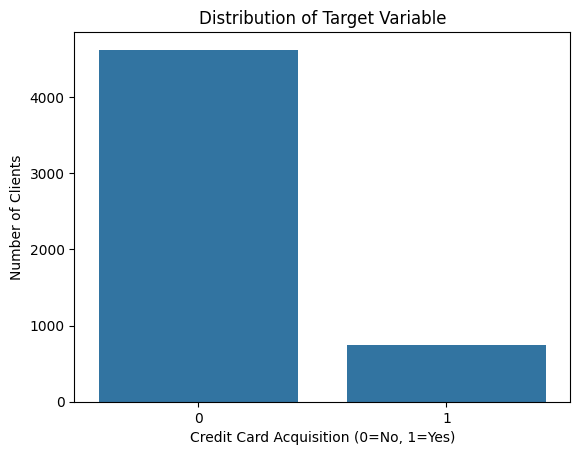

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=model_data_cleaned)
plt.title('Distribution of Target Variable')
plt.xlabel('Credit Card Acquisition (0=No, 1=Yes)')
plt.ylabel('Number of Clients')
plt.show()


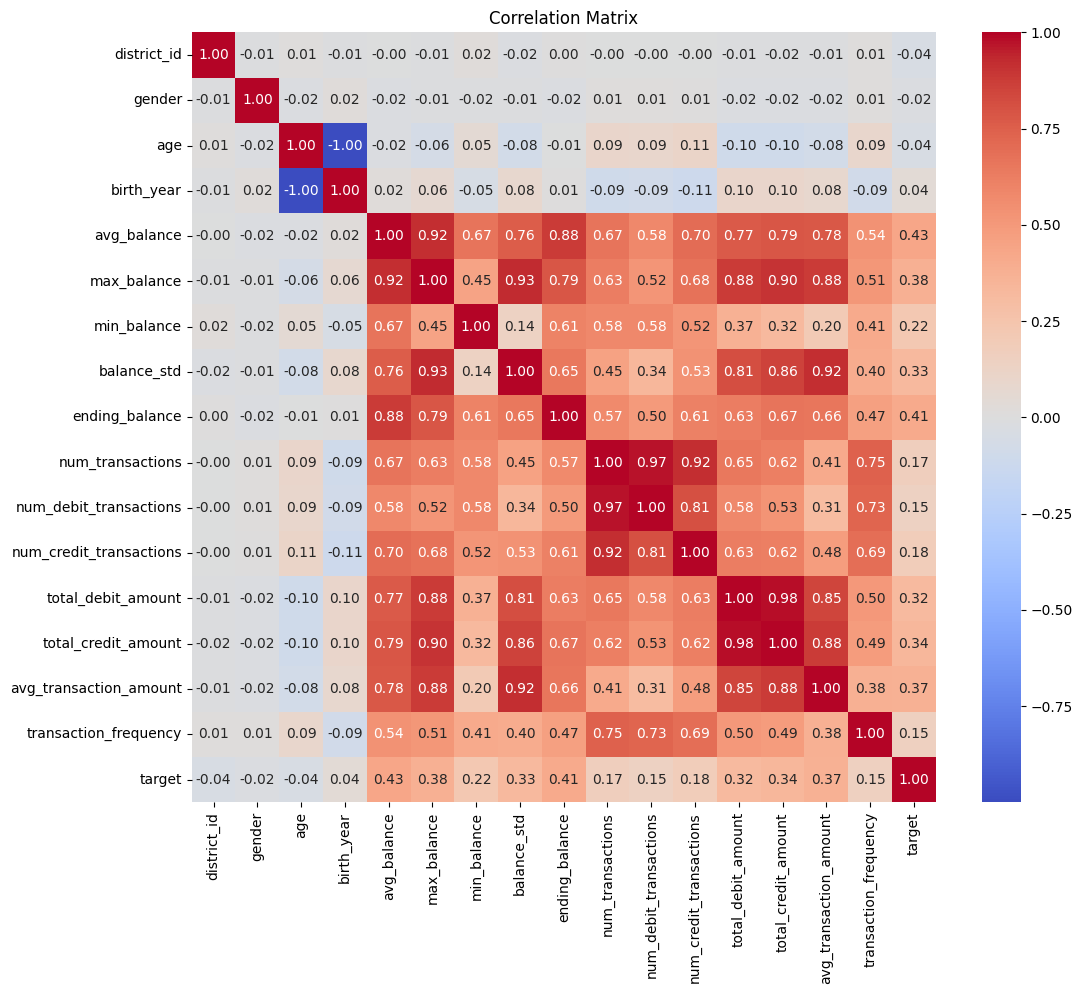

In [72]:
corr_matrix = model_data_cleaned.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


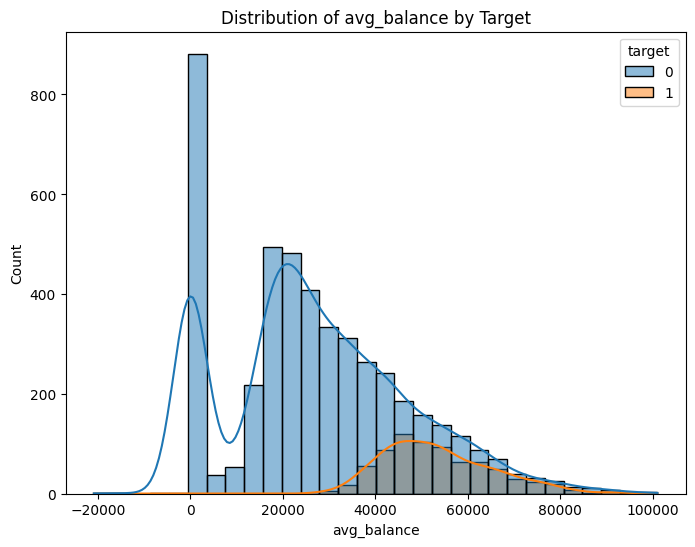

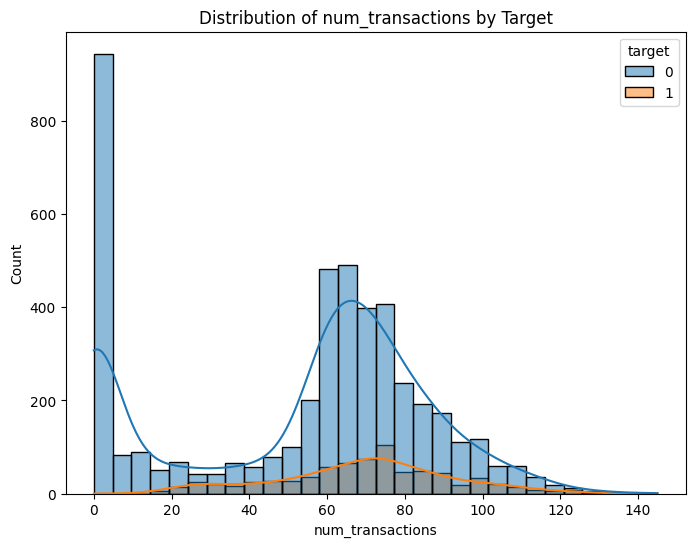

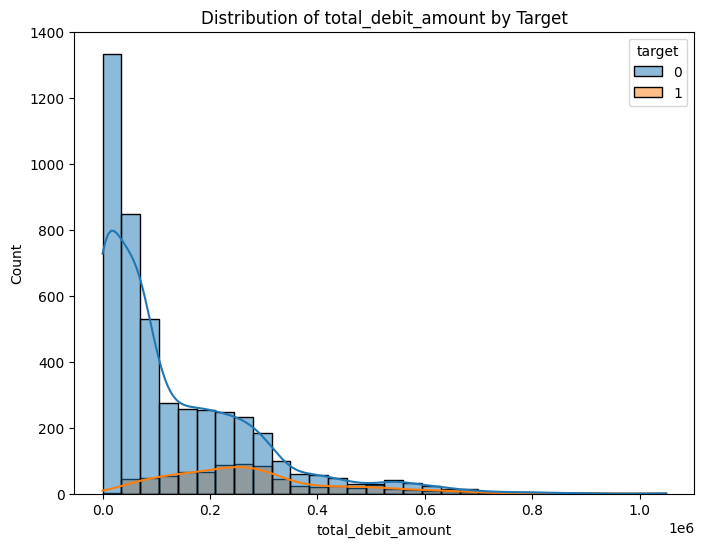

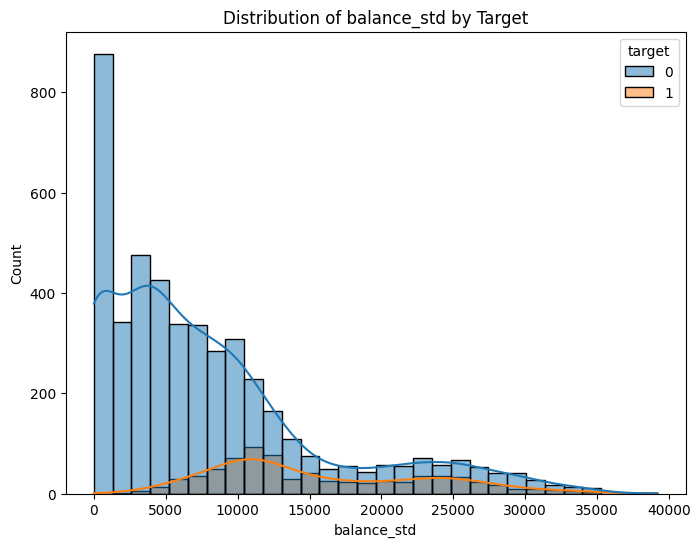

In [73]:
feature_list = ['avg_balance', 'num_transactions', 'total_debit_amount', 'balance_std']

for feature in feature_list:
    plt.figure(figsize=(8,6))
    sns.histplot(data=model_data_cleaned, x=feature, hue='target', bins=30, kde=True)
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = model_data_cleaned.drop(columns=[ 'target', "gender", "district_id"], axis=1)
scaled_features = scaler.fit_transform(features)

# Replace features with scaled values
model_data_cleaned[features.columns] = scaled_features


In [75]:
from sklearn.model_selection import train_test_split

X = model_data_cleaned.drop('target', axis=1)
y = model_data_cleaned['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Model Development


## 10. Partitioning the Data into Training and Test Sets


In [76]:
model_data_cleaned.head()

,district_id,gender,age,birth_year,avg_balance,max_balance,min_balance,balance_std,ending_balance,num_transactions,num_debit_transactions,num_credit_transactions,total_debit_amount,total_credit_amount,avg_transaction_amount,transaction_frequency,target
0,18,1,-0.973416,0.972279,-0.666714,-0.721301,-0.153907,-0.809567,-0.652682,0.568395,0.494570,0.751447,-0.621663,-0.678327,-0.786977,0.377329,0
1,1,0,0.472270,-0.474424,0.553410,0.418249,0.580247,0.214328,0.317401,0.811264,0.805153,0.573208,0.739191,0.622626,0.465239,0.604520,0
2,1,1,0.761408,-0.763764,0.577526,0.418249,0.933818,0.152320,-0.210672,0.963057,0.982628,0.484089,0.638376,0.600424,0.385309,0.786549,0
3,5,0,-0.163832,0.162126,-0.516244,-0.553889,-0.945873,-0.190009,-1.003608,-0.403082,-0.392808,-0.317984,-0.590278,-0.588312,-0.435311,0.247481,0
4,5,1,-0.395142,0.393598,-0.412375,-0.515535,-0.430264,-0.409211,-0.036889,0.720188,0.672046,0.840566,-0.375726,-0.309718,-0.512779,0.499858,0


In [77]:
# Features specified for the baseline model
features = ['age', 'gender', 'district_id', 'avg_balance', 'total_credit_amount']

# Assuming 'target' is the target variable indicating credit card acquisition
X = model_data_cleaned[features]
y = model_data_cleaned['target']


In [78]:
# One-hot encode 'region' (if it's a categorical variable)
X = pd.get_dummies(X, columns=['district_id'], drop_first=True)


In [79]:
from sklearn.model_selection import train_test_split

# Split the data (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


## 11. Creating a Baseline Model Using Logistic Regression


In [80]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the results
print('Baseline Logistic Regression Model Performance:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')


Baseline Logistic Regression Model Performance:
Accuracy: 0.8492
Precision: 0.4059
Recall: 0.1830
F1 Score: 0.2523
ROC AUC Score: 0.8658


In [82]:
# Get the coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
})

print(coefficients)


                Feature  Coefficient
0                   age     0.000395
1                gender    -0.070131
2           avg_balance     1.688953
3   total_credit_amount    -0.167104
4         district_id_2     0.540652
..                  ...          ...
75       district_id_73     0.378487
76       district_id_74    -0.486088
77       district_id_75    -0.236018
78       district_id_76    -0.236720
79       district_id_77    -0.406686

[80 rows x 2 columns]


## 12. Systematically Exploring Improvements to the Baseline Model


In [ ]:
# Include additional features
additional_features = [
    'num_transactions', 'total_debit_amount', 'avg_transaction_amount',
    'balance_std', 'ending_balance']

# Combine with previous features
expanded_features = features + additional_features

# Prepare the dataset
X_expanded = model_data_cleaned[expanded_features]

# Handle categorical variables
X_expanded['gender'] = X_expanded['gender'].map({'M': 0, 'F': 1})
X_expanded = pd.get_dummies(X_expanded, columns=['district_id'], drop_first=True)

# Fill missing values if any
X_expanded.fillna(0, inplace=True)

# Split the data
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
    X_expanded, y, test_size=0.3, random_state=42, stratify=y
)


/tmp/ipykernel_1288/916654266.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_expanded['gender'] = X_expanded['gender'].map({'M': 0, 'F': 1})


In [84]:
# Instantiate and train the model
log_reg_exp = LogisticRegression(max_iter=1000)
log_reg_exp.fit(X_train_exp, y_train_exp)

# Evaluate the model
y_pred_exp = log_reg_exp.predict(X_test_exp)
y_pred_proba_exp = log_reg_exp.predict_proba(X_test_exp)[:, 1]

# Calculate evaluation metrics
accuracy_exp = accuracy_score(y_test_exp, y_pred_exp)
precision_exp = precision_score(y_test_exp, y_pred_exp)
recall_exp = recall_score(y_test_exp, y_pred_exp)
f1_exp = f1_score(y_test_exp, y_pred_exp)
roc_auc_exp = roc_auc_score(y_test_exp, y_pred_proba_exp)

# Print the results
print('Expanded Logistic Regression Model Performance:')
print(f'Accuracy: {accuracy_exp:.4f}')
print(f'Precision: {precision_exp:.4f}')
print(f'Recall: {recall_exp:.4f}')
print(f'F1 Score: {f1_exp:.4f}')
print(f'ROC AUC Score: {roc_auc_exp:.4f}')


Expanded Logistic Regression Model Performance:
Accuracy: 0.8560
Precision: 0.4636
Recall: 0.2277
F1 Score: 0.3054
ROC AUC Score: 0.8774


In [85]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train_exp, y_train_exp)

# Evaluate the model
y_pred_rf = rf_clf.predict(X_test_exp)
y_pred_proba_rf = rf_clf.predict_proba(X_test_exp)[:, 1]

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test_exp, y_pred_rf)
precision_rf = precision_score(y_test_exp, y_pred_rf)
recall_rf = recall_score(y_test_exp, y_pred_rf)
f1_rf = f1_score(y_test_exp, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test_exp, y_pred_proba_rf)

# Print the results
print('Random Forest Model Performance:')
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1 Score: {f1_rf:.4f}')
print(f'ROC AUC Score: {roc_auc_rf:.4f}')


Random Forest Model Performance:
Accuracy: 0.8777
Precision: 0.6239
Recall: 0.3036
F1 Score: 0.4084
ROC AUC Score: 0.8986


In [86]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train_exp, y_train_exp)

# Best parameters
print(f'Best parameters found: {grid_search.best_params_}')

# Best estimator
best_rf = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_rf = best_rf.predict(X_test_exp)
y_pred_proba_best_rf = best_rf.predict_proba(X_test_exp)[:, 1]

# Calculate evaluation metrics
accuracy_best_rf = accuracy_score(y_test_exp, y_pred_best_rf)
precision_best_rf = precision_score(y_test_exp, y_pred_best_rf)
recall_best_rf = recall_score(y_test_exp, y_pred_best_rf)
f1_best_rf = f1_score(y_test_exp, y_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_test_exp, y_pred_proba_best_rf)

# Print the results
print('Optimized Random Forest Model Performance:')
print(f'Accuracy: {accuracy_best_rf:.4f}')
print(f'Precision: {precision_best_rf:.4f}')
print(f'Recall: {recall_best_rf:.4f}')
print(f'F1 Score: {f1_best_rf:.4f}')
print(f'ROC AUC Score: {roc_auc_best_rf:.4f}')


Best parameters found: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Model Performance:
Accuracy: 0.8734
Precision: 0.6111
Recall: 0.2455
F1 Score: 0.3503
ROC AUC Score: 0.9044


In [87]:
importances = best_rf.feature_importances_
feature_names = X_train_exp.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importance_df)


                   Feature  Importance
2              avg_balance    0.209709
8           ending_balance    0.196482
6   avg_transaction_amount    0.106740
7              balance_std    0.102073
3      total_credit_amount    0.089704
..                     ...         ...
32          district_id_25    0.000418
20          district_id_13    0.000381
56          district_id_49    0.000336
31          district_id_24    0.000297
1                   gender    0.000000

[85 rows x 2 columns]


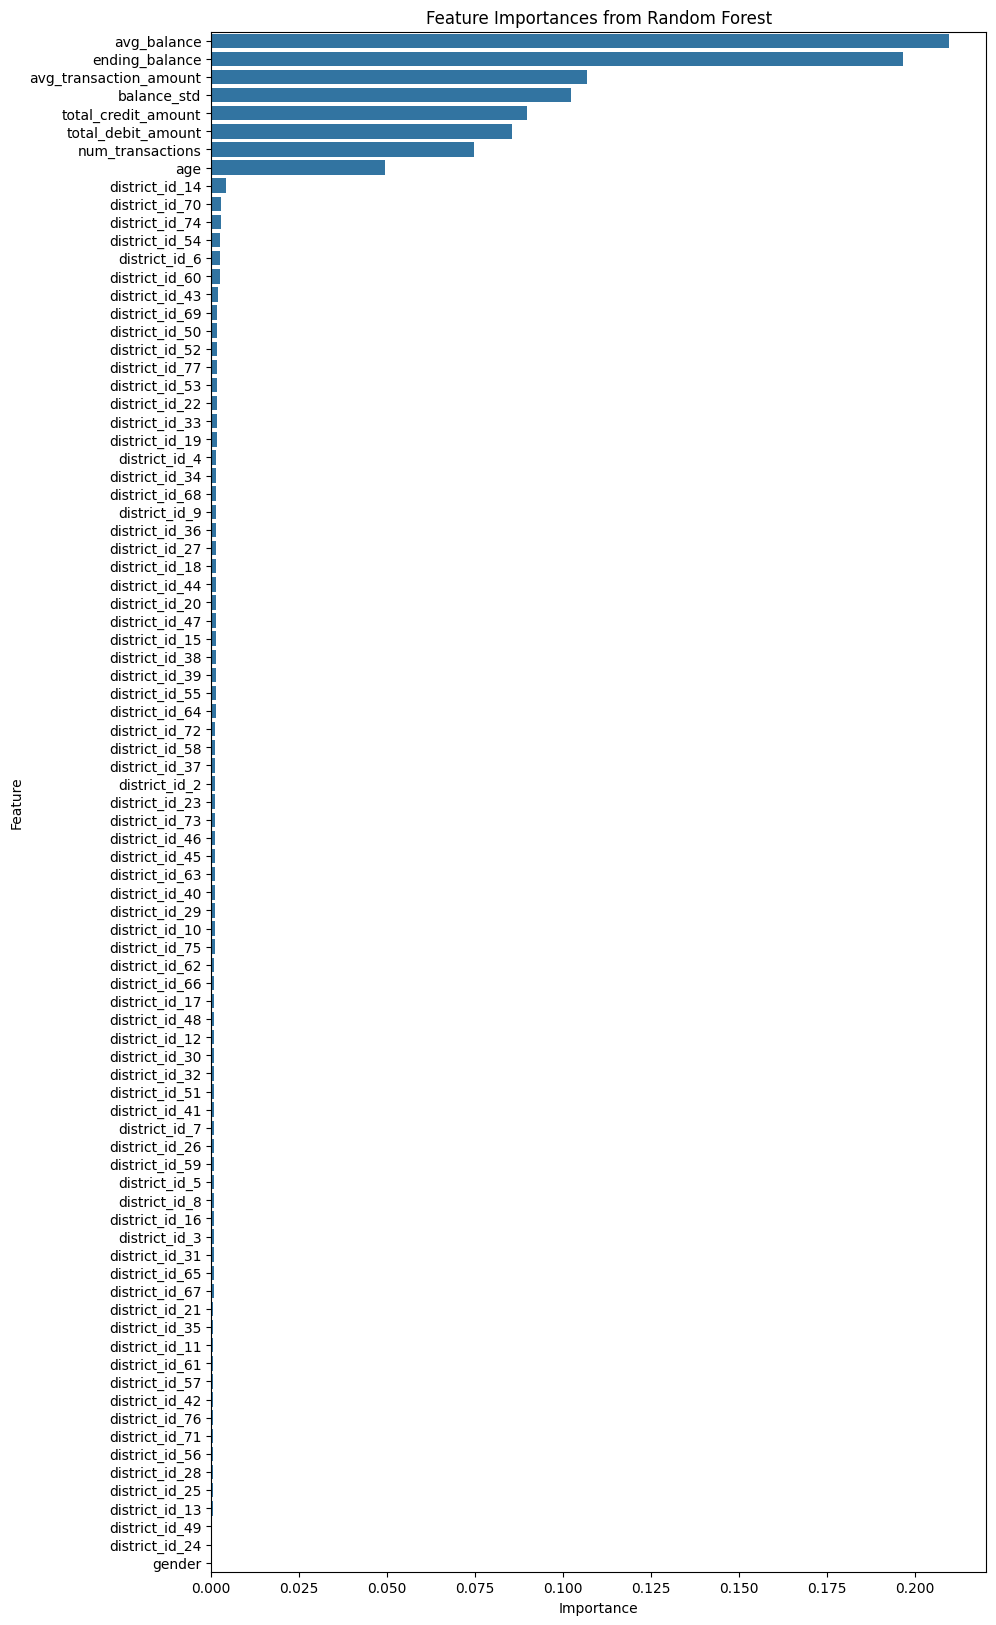

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 20))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()


In [89]:
performance_summary = pd.DataFrame({
    'Model': ['Baseline Logistic Regression', 'Expanded Logistic Regression', 'Random Forest', 'Optimized Random Forest'],
    'Accuracy': [accuracy, accuracy_exp, accuracy_rf, accuracy_best_rf],
    'Precision': [precision, precision_exp, precision_rf, precision_best_rf],
    'Recall': [recall, recall_exp, recall_rf, recall_best_rf],
    'F1 Score': [f1, f1_exp, f1_rf, f1_best_rf],
    'ROC AUC': [roc_auc, roc_auc_exp, roc_auc_rf, roc_auc_best_rf]
})

print(performance_summary)


                          Model  Accuracy  Precision    Recall  F1 Score  \
0  Baseline Logistic Regression  0.849162   0.405941  0.183036  0.252308   
1  Expanded Logistic Regression  0.855990   0.463636  0.227679  0.305389   
2                 Random Forest  0.877716   0.623853  0.303571  0.408408   
3       Optimized Random Forest  0.873371   0.611111  0.245536  0.350318   

    ROC AUC  
0  0.865804  
1  0.877398  
2  0.898636  
3  0.904431  


# Model Comparison, Selection, and Optimization


## 13. Comparing Candidate Models and Identifying the Best Model Using ROC, AUC, and Precision


In [90]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Baseline Logistic Regression
baseline_metrics = {
    'Model': 'Baseline Logistic Regression',
    'ROC AUC': roc_auc_score(y_test, y_pred_proba),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

# Expanded Logistic Regression
expanded_metrics = {
    'Model': 'Expanded Logistic Regression',
    'ROC AUC': roc_auc_score(y_test_exp, y_pred_proba_exp),
    'Precision': precision_score(y_test_exp, y_pred_exp),
    'Recall': recall_score(y_test_exp, y_pred_exp),
    'F1 Score': f1_score(y_test_exp, y_pred_exp)
}

# Random Forest
rf_metrics = {
    'Model': 'Random Forest',
    'ROC AUC': roc_auc_score(y_test_exp, y_pred_proba_rf),
    'Precision': precision_score(y_test_exp, y_pred_rf),
    'Recall': recall_score(y_test_exp, y_pred_rf),
    'F1 Score': f1_score(y_test_exp, y_pred_rf)
}

# Optimized Random Forest
opt_rf_metrics = {
    'Model': 'Optimized Random Forest',
    'ROC AUC': roc_auc_score(y_test_exp, y_pred_proba_best_rf),
    'Precision': precision_score(y_test_exp, y_pred_best_rf),
    'Recall': recall_score(y_test_exp, y_pred_best_rf),
    'F1 Score': f1_score(y_test_exp, y_pred_best_rf)
}

# Create a DataFrame for comparison
metrics_df = pd.DataFrame([baseline_metrics, expanded_metrics, rf_metrics, opt_rf_metrics])
print(metrics_df)


                          Model   ROC AUC  Precision    Recall  F1 Score
0  Baseline Logistic Regression  0.865804   0.405941  0.183036  0.252308
1  Expanded Logistic Regression  0.877398   0.463636  0.227679  0.305389
2                 Random Forest  0.898636   0.623853  0.303571  0.408408
3       Optimized Random Forest  0.904431   0.611111  0.245536  0.350318


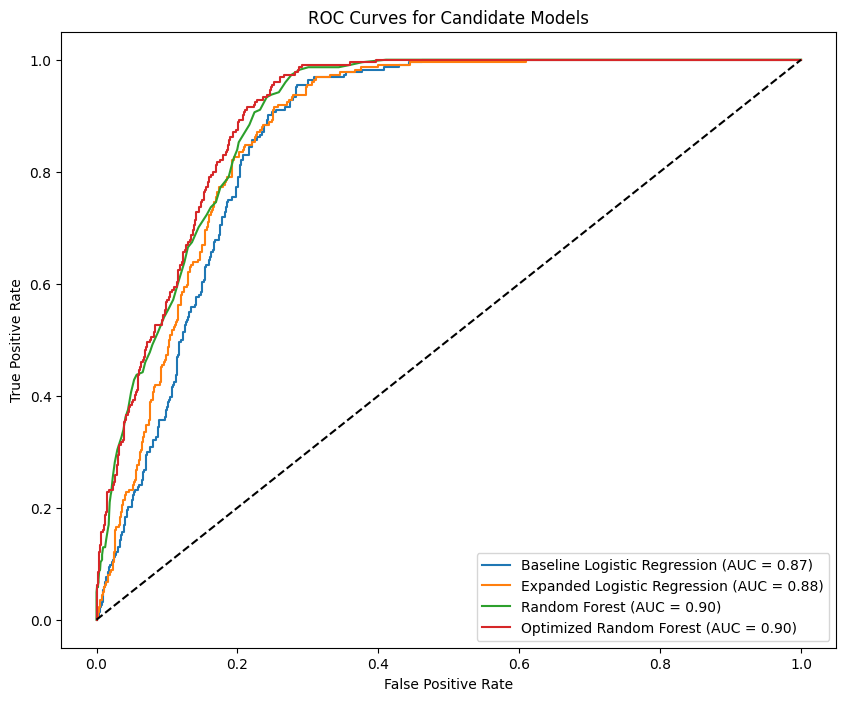

In [91]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Baseline Logistic Regression
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Baseline Logistic Regression (AUC = {:.2f})'.format(baseline_metrics['ROC AUC']))

# Expanded Logistic Regression
fpr_exp, tpr_exp, _ = roc_curve(y_test_exp, y_pred_proba_exp)
plt.plot(fpr_exp, tpr_exp, label='Expanded Logistic Regression (AUC = {:.2f})'.format(expanded_metrics['ROC AUC']))

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_exp, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(rf_metrics['ROC AUC']))

# Optimized Random Forest
fpr_opt_rf, tpr_opt_rf, _ = roc_curve(y_test_exp, y_pred_proba_best_rf)
plt.plot(fpr_opt_rf, tpr_opt_rf, label='Optimized Random Forest (AUC = {:.2f})'.format(opt_rf_metrics['ROC AUC']))

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Candidate Models')
plt.legend(loc='lower right')
plt.show()


## 14. Quantitative Examination of Differences in Top-N Customer Lists of Different Models


In [92]:
import pandas as pd

# Determine the number of top customers for 5% and 10%
N_5 = int(0.05 * len(X_test))
N_10 = int(0.10 * len(X_test))

# Create DataFrames with client IDs and predicted probabilities for each model
baseline_probs = pd.DataFrame({'client_id': X_test.index, 'probability': y_pred_proba})
expanded_probs = pd.DataFrame({'client_id': X_test.index, 'probability': y_pred_proba_exp})
rf_probs = pd.DataFrame({'client_id': X_test.index, 'probability': y_pred_proba_rf})
opt_rf_probs = pd.DataFrame({'client_id': X_test.index, 'probability': y_pred_proba_best_rf})

# Sort by probability (descending) and select top 5% and top 10%
top5_baseline = set(baseline_probs.sort_values('probability', ascending=False).head(N_5)['client_id'])
top5_expanded = set(expanded_probs.sort_values('probability', ascending=False).head(N_5)['client_id'])
top5_rf = set(rf_probs.sort_values('probability', ascending=False).head(N_5)['client_id'])
top5_opt_rf = set(opt_rf_probs.sort_values('probability', ascending=False).head(N_5)['client_id'])

top10_baseline = set(baseline_probs.sort_values('probability', ascending=False).head(N_10)['client_id'])
top10_expanded = set(expanded_probs.sort_values('probability', ascending=False).head(N_10)['client_id'])
top10_rf = set(rf_probs.sort_values('probability', ascending=False).head(N_10)['client_id'])
top10_opt_rf = set(opt_rf_probs.sort_values('probability', ascending=False).head(N_10)['client_id'])

# Calculate overlaps for top 5%
overlap_5_baseline_expanded = len(top5_baseline & top5_expanded)
overlap_5_baseline_rf = len(top5_baseline & top5_rf)
overlap_5_baseline_opt_rf = len(top5_baseline & top5_opt_rf)
overlap_5_expanded_rf = len(top5_expanded & top5_rf)
overlap_5_expanded_opt_rf = len(top5_expanded & top5_opt_rf)
overlap_5_rf_opt_rf = len(top5_rf & top5_opt_rf)

# Calculate overlaps for top 10%
overlap_10_baseline_expanded = len(top10_baseline & top10_expanded)
overlap_10_baseline_rf = len(top10_baseline & top10_rf)
overlap_10_baseline_opt_rf = len(top10_baseline & top10_opt_rf)
overlap_10_expanded_rf = len(top10_expanded & top10_rf)
overlap_10_expanded_opt_rf = len(top10_expanded & top10_opt_rf)
overlap_10_rf_opt_rf = len(top10_rf & top10_opt_rf)

# Display overlaps
print("Top 5% Overlaps:")
print(f'Overlap between Baseline and Expanded Logistic Regression (Top 5%): {overlap_5_baseline_expanded}')
print(f'Overlap between Baseline and Random Forest (Top 5%): {overlap_5_baseline_rf}')
print(f'Overlap between Baseline and Optimized Random Forest (Top 5%): {overlap_5_baseline_opt_rf}')
print(f'Overlap between Expanded Logistic Regression and Random Forest (Top 5%): {overlap_5_expanded_rf}')
print(f'Overlap between Expanded Logistic Regression and Optimized Random Forest (Top 5%): {overlap_5_expanded_opt_rf}')
print(f'Overlap between Random Forest and Optimized Random Forest (Top 5%): {overlap_5_rf_opt_rf}')

print("\nTop 10% Overlaps:")
print(f'Overlap between Baseline and Expanded Logistic Regression (Top 10%): {overlap_10_baseline_expanded}')
print(f'Overlap between Baseline and Random Forest (Top 10%): {overlap_10_baseline_rf}')
print(f'Overlap between Baseline and Optimized Random Forest (Top 10%): {overlap_10_baseline_opt_rf}')
print(f'Overlap between Expanded Logistic Regression and Random Forest (Top 10%): {overlap_10_expanded_rf}')
print(f'Overlap between Expanded Logistic Regression and Optimized Random Forest (Top 10%): {overlap_10_expanded_opt_rf}')
print(f'Overlap between Random Forest and Optimized Random Forest (Top 10%): {overlap_10_rf_opt_rf}')


Top 5% Overlaps:
Overlap between Baseline and Expanded Logistic Regression (Top 5%): 57
Overlap between Baseline and Random Forest (Top 5%): 17
Overlap between Baseline and Optimized Random Forest (Top 5%): 11
Overlap between Expanded Logistic Regression and Random Forest (Top 5%): 23
Overlap between Expanded Logistic Regression and Optimized Random Forest (Top 5%): 23
Overlap between Random Forest and Optimized Random Forest (Top 5%): 61

Top 10% Overlaps:
Overlap between Baseline and Expanded Logistic Regression (Top 10%): 127
Overlap between Baseline and Random Forest (Top 10%): 63
Overlap between Baseline and Optimized Random Forest (Top 10%): 61
Overlap between Expanded Logistic Regression and Random Forest (Top 10%): 81
Overlap between Expanded Logistic Regression and Optimized Random Forest (Top 10%): 83
Overlap between Random Forest and Optimized Random Forest (Top 10%): 138


## 15. Optimizing the Best Candidate Model Regarding Hyperparameter Settings


In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(10, 51, 10)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False]
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Fit to the training data
random_search.fit(X_train_exp, y_train_exp)

# Best parameters found
print("Best parameters found:")
print(random_search.best_params_)

# Best estimator
best_model = random_search.best_estimator_


Best parameters found:
{'bootstrap': False, 'max_depth': 40, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 297}


In [94]:
# Predictions on the test set
y_pred_best = best_model.predict(X_test_exp)
y_pred_proba_best = best_model.predict_proba(X_test_exp)[:, 1]

# Calculate evaluation metrics
best_metrics = {
    'Model': 'Further Optimized Random Forest',
    'ROC AUC': roc_auc_score(y_test_exp, y_pred_proba_best),
    'Precision': precision_score(y_test_exp, y_pred_best),
    'Recall': recall_score(y_test_exp, y_pred_best),
    'F1 Score': f1_score(y_test_exp, y_pred_best)
}

print("Further Optimized Random Forest Model Performance:")
print(best_metrics)


Further Optimized Random Forest Model Performance:
{'Model': 'Further Optimized Random Forest', 'ROC AUC': 0.9038488773303122, 'Precision': 0.627906976744186, 'Recall': 0.24107142857142858, 'F1 Score': 0.34838709677419355}


In [95]:
new_row = pd.DataFrame([best_metrics])

metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

print(metrics_df)


                             Model   ROC AUC  Precision    Recall  F1 Score
0     Baseline Logistic Regression  0.865804   0.405941  0.183036  0.252308
1     Expanded Logistic Regression  0.877398   0.463636  0.227679  0.305389
2                    Random Forest  0.898636   0.623853  0.303571  0.408408
3          Optimized Random Forest  0.904431   0.611111  0.245536  0.350318
4  Further Optimized Random Forest  0.903849   0.627907  0.241071  0.348387


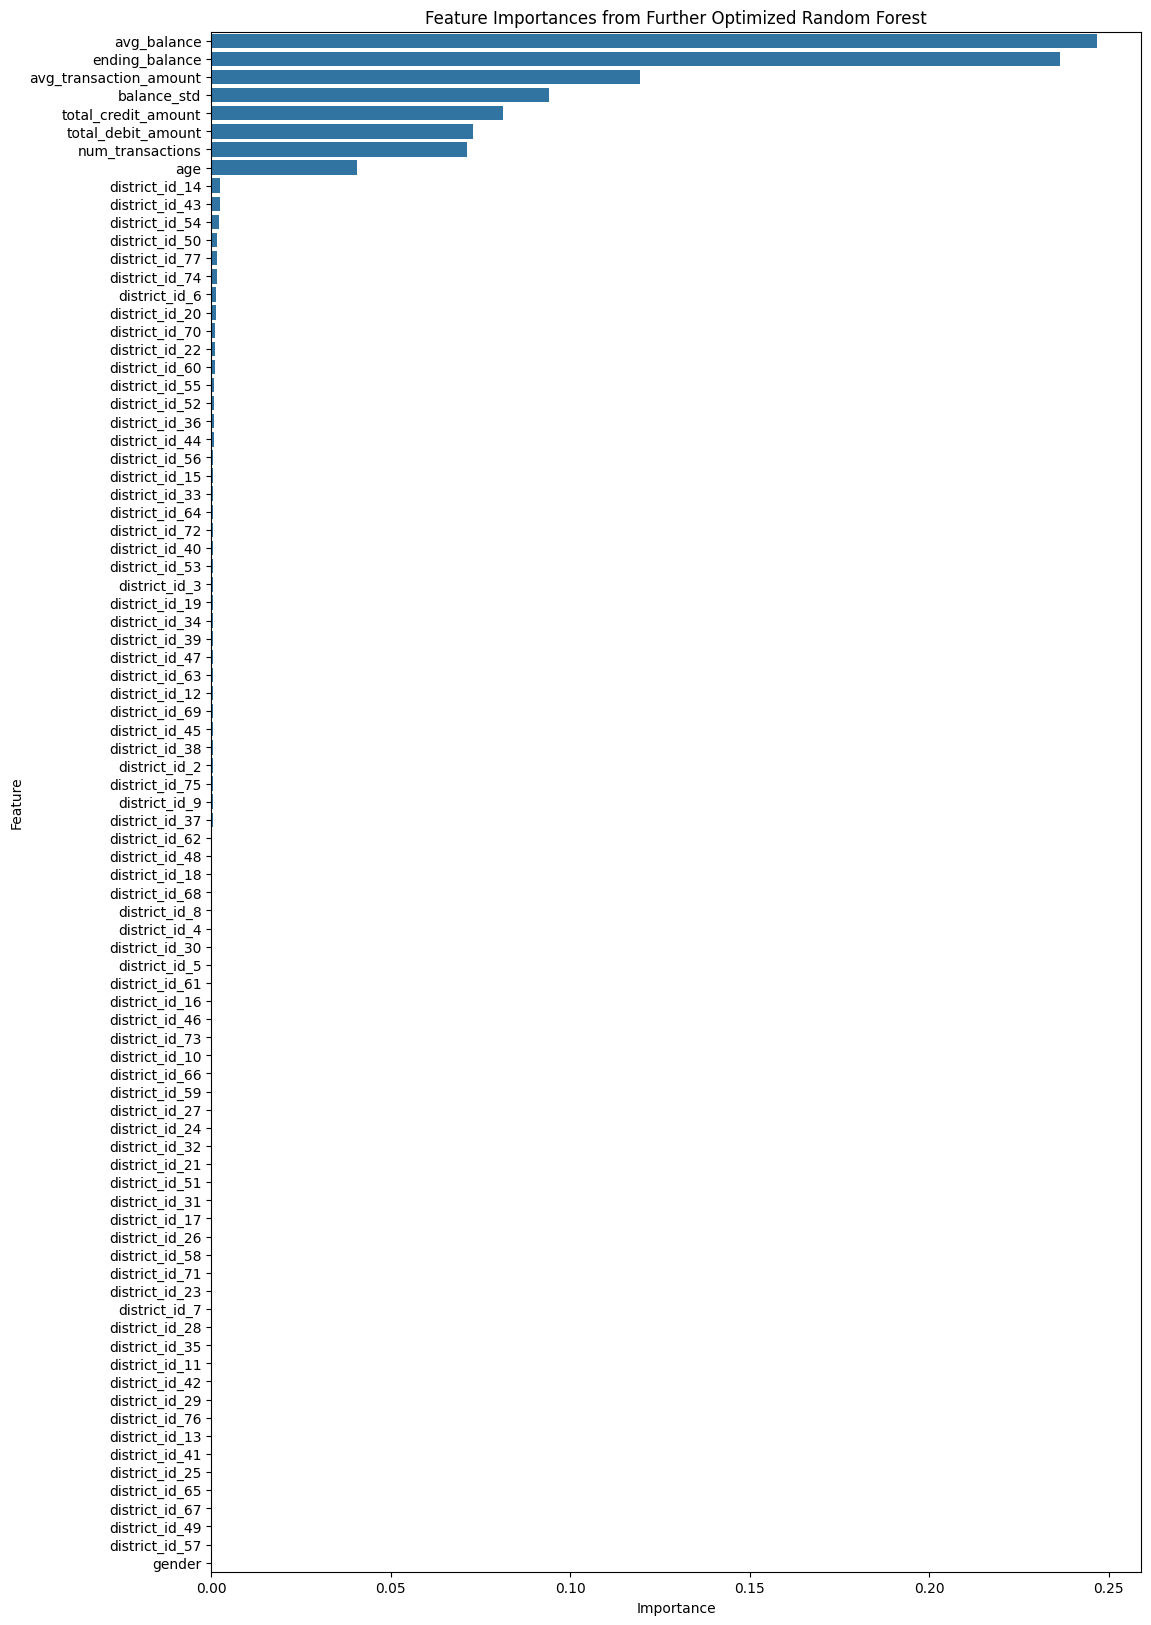

In [96]:
# Feature importances
importances = best_model.feature_importances_
feature_names = X_train_exp.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(12, 20))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Further Optimized Random Forest')
plt.show()


# Model Explanation and Reduction


## 16. Examining Global Feature Importance and Model Reduction


In [97]:
# Extract feature importances from the best model
importances = best_model.feature_importances_
feature_names = X_train_exp.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
importance_df.sort_values(by='Importance', ascending=False, inplace=True)


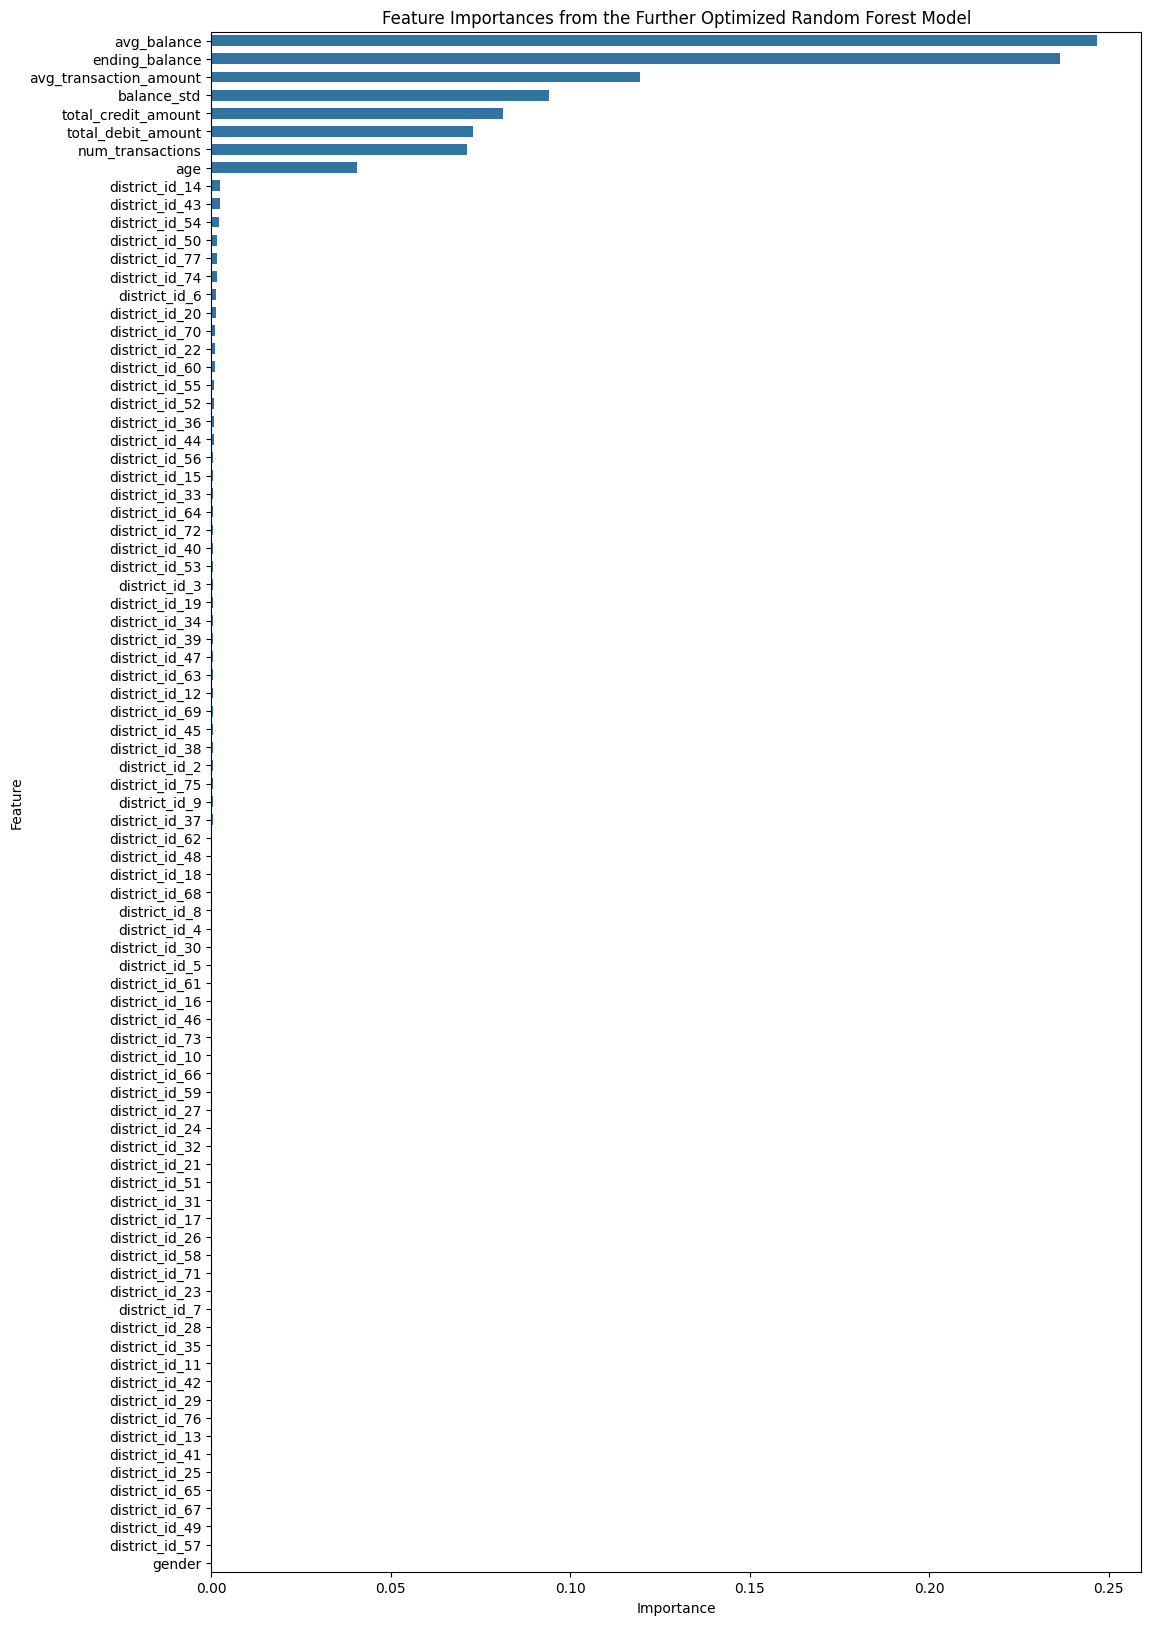

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 20))
sns.barplot(x='Importance', y='Feature', data=importance_df, linewidth=5, width=0.6)
plt.title('Feature Importances from the Further Optimized Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Adjust the spacing between y-axis labels
plt.yticks(ticks=range(len(importance_df)), labels=importance_df['Feature'], rotation=0, fontsize=10)

plt.show()

In [99]:
# Select top N features
N = 5
top_features = importance_df['Feature'].head(N).tolist()
print(f"Top {N} features: {top_features}")


Top 5 features: ['avg_balance', 'ending_balance', 'avg_transaction_amount', 'balance_std', 'total_credit_amount']


In [100]:
# Prepare the dataset with only top features
X_train_reduced = X_train_exp[top_features]
X_test_reduced = X_test_exp[top_features]

# Retrain the model
best_model_reduced = RandomForestClassifier(random_state=42, **random_search.best_params_)
best_model_reduced.fit(X_train_reduced, y_train_exp)

# Evaluate the reduced model
y_pred_reduced = best_model_reduced.predict(X_test_reduced)
y_pred_proba_reduced = best_model_reduced.predict_proba(X_test_reduced)[:, 1]

# Calculate evaluation metrics
reduced_metrics = {
    'Model': 'Reduced Optimized Random Forest',
    'ROC AUC': roc_auc_score(y_test_exp, y_pred_proba_reduced),
    'Precision': precision_score(y_test_exp, y_pred_reduced),
    'Recall': recall_score(y_test_exp, y_pred_reduced),
    'F1 Score': f1_score(y_test_exp, y_pred_reduced)
}

print("Reduced Optimized Random Forest Model Performance:")
print(reduced_metrics)


Reduced Optimized Random Forest Model Performance:
{'Model': 'Reduced Optimized Random Forest', 'ROC AUC': 0.8850583221753013, 'Precision': 0.461038961038961, 'Recall': 0.3169642857142857, 'F1 Score': 0.37566137566137564}


In [101]:
new_row = pd.DataFrame([reduced_metrics])

metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)
print(metrics_df)


                             Model   ROC AUC  Precision    Recall  F1 Score
0     Baseline Logistic Regression  0.865804   0.405941  0.183036  0.252308
1     Expanded Logistic Regression  0.877398   0.463636  0.227679  0.305389
2                    Random Forest  0.898636   0.623853  0.303571  0.408408
3          Optimized Random Forest  0.904431   0.611111  0.245536  0.350318
4  Further Optimized Random Forest  0.903849   0.627907  0.241071  0.348387
5  Reduced Optimized Random Forest  0.885058   0.461039  0.316964  0.375661


In [102]:
# Function to evaluate model with varying number of top features
def evaluate_model_with_top_features(num_features):
    selected_features = importance_df['Feature'].head(num_features).tolist()
    X_train_subset = X_train_exp[selected_features]
    X_test_subset = X_test_exp[selected_features]
    
    model = RandomForestClassifier(random_state=42, **random_search.best_params_)
    model.fit(X_train_subset, y_train_exp)
    
    y_pred = model.predict(X_test_subset)
    y_pred_proba = model.predict_proba(X_test_subset)[:, 1]
    
    roc_auc = roc_auc_score(y_test_exp, y_pred_proba)
    precision = precision_score(y_test_exp, y_pred)
    recall = recall_score(y_test_exp, y_pred)
    f1 = f1_score(y_test_exp, y_pred)
    
    return {'Num_Features': num_features, 'ROC AUC': roc_auc, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Evaluate models with varying number of top features
results = []
for n in range(1, len(feature_names)+1):
    result = evaluate_model_with_top_features(n)
    results.append(result)

# Create DataFrame of results
reduction_results = pd.DataFrame(results)


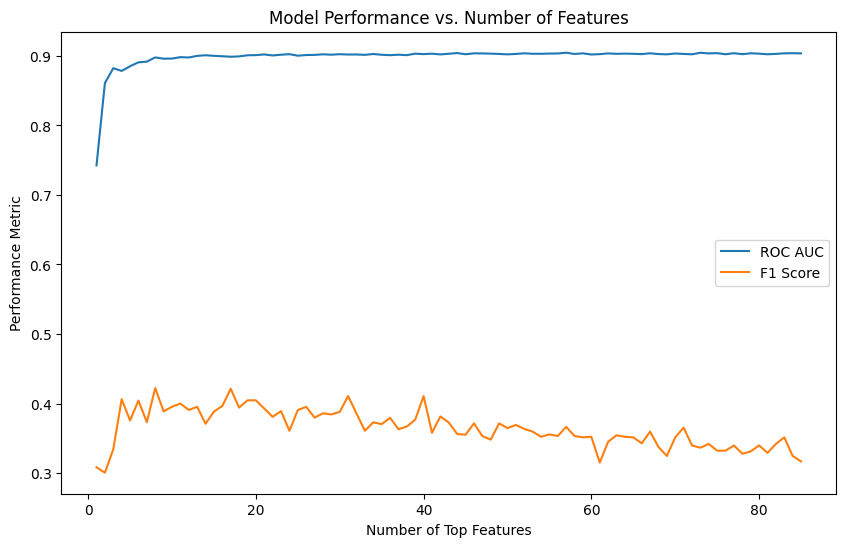

In [103]:
plt.figure(figsize=(10, 6))
plt.plot(reduction_results['Num_Features'], reduction_results['ROC AUC'], label='ROC AUC')
plt.plot(reduction_results['Num_Features'], reduction_results['F1 Score'], label='F1 Score')
plt.xlabel('Number of Top Features')
plt.ylabel('Performance Metric')
plt.title('Model Performance vs. Number of Features')
plt.legend()
plt.show()


## 17. Describing the Added Value of the Final Model in Practice


- The must not be juniors cards 
- new features creations
- balance databset (new reference data)